#0. Environment Setting

In [ ]:
import pandas as pd
import numpy as np
import chardet
import glob
import os
from scipy import stats

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.patches as patches


In [ ]:
!pip install hmmlearn
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 kB 5.2 MB/s eta 0:00:00


#1. Data Preparation

###1.1 Data import and merge

In [ ]:
# dau file list
dau_files = glob.glob("/content/DAU*.csv")
dau_files

['/content/DAU Identity V(Mar 31, 2018 - Jul 13, 2025, 中国).csv',
 '/content/DAU Justice (May 20, 2023 - Jul 13, 2025, 中国).csv',
 '/content/DAU Genshin Impact (Sep 25, 2020 - Jul 12, 2025, 中国).csv',
 '/content/DAU Zenless Zero Zone (Jul 2, 2024 - Jul 12, 2025, 中国).csv',
 '/content/DAU Life After (Oct 31, 2018 - Jul 13, 2025, 中国).csv',
 '/content/DAU Metal Slug Awakening(Apr 18, 2023 - Jul 13, 2025, 中国).csv',
 '/content/DAU Honor of King  (Oct 25, 2015 - Jul 13, 2025, 中国).csv',
 '/content/DAU Dawn of Kingdoms (Mar 29, 2022 - Jul 13, 2025, 中国).csv',
 '/content/DAU  PUBG Mobile (Feb 8, 2018 - Jul 13, 2025, 中国).csv',
 '/content/DAU Honkai Star Rail (Apr 23, 2023 - Jul 12, 2025, 中国).csv']

In [ ]:
#rev file list
rev_files = glob.glob("/content/revenue*.csv")
rev_files

['/content/revenue Genshin Impact (Sep 25, 2020 - Jul 13, 2025, 中国), 详细.csv',
 '/content/revenue HonKai Star Rail (Apr 23, 2023 - Jul 13, 2025, 中国).csv',
 '/content/revenue Zenless Zero Zone (Jul 2, 2024 - Jul 13, 2025, 中国).csv',
 '/content/revenue Justice (May 20, 2023 - Jul 14, 2025, 中国).csv',
 '/content/revenue PUBG Mobile (Feb 8, 2018 - Jul 14, 2025, 中国).csv',
 '/content/revenue Identity V (Mar 31, 2018 - Jul 14, 2025, 中国).csv',
 '/content/revenue Honor of King(Oct 25, 2015 - Jul 14, 2025, 中国).csv',
 '/content/revenue Dawn of Kingdoms (Mar 29, 2022 - Jul 14, 2025, 中国).csv',
 '/content/revenue Life After (Oct 31, 2018 - Jul 14, 2025, 中国), 详细.csv',
 '/content/revenue Metal Slug Awakening (Apr 18, 2023 - Jul 14, 2025, 中国).csv']

In [ ]:
#Check and try encoding

def smart_read_csv(file_path, try_encodings=None, try_seps=None):
    """
    检测 encoding&分隔符，直到成功解析为多列
    """
    if try_encodings is None:
        try_encodings = ['utf-8', 'utf-16', 'latin1', 'cp949']
    if try_seps is None:
        try_seps = [',', '\t', ';']

    # try charde
    with open(file_path, 'rb') as f:
        raw_data = f.read()
        detect_enc = chardet.detect(raw_data)['encoding']
        if detect_enc and detect_enc not in try_encodings:
            try_encodings.insert(0, detect_enc)

    # try all
    for enc in try_encodings:
        for sep in try_seps:
            try:
                df = pd.read_csv(file_path, encoding=enc, sep=sep)
                if df.shape[1] > 1:
                    print(f" 成功读取: {file_path}, encoding={enc}, sep='{sep}', shape={df.shape}")
                    return df
            except Exception as e:
                continue

    raise Exception(f"无法解析文件: {file_path}")


#apply
df_dau = pd.concat([smart_read_csv(f) for f in dau_files], ignore_index=True)
df_rev = pd.concat([smart_read_csv(f) for f in rev_files], ignore_index=True)

 成功读取: /content/DAU Identity V(Mar 31, 2018 - Jul 13, 2025, 中国).csv, encoding=UTF-16, sep='	', shape=(6400, 13)
 成功读取: /content/DAU Justice (May 20, 2023 - Jul 13, 2025, 中国).csv, encoding=GB2312, sep=',', shape=(3070, 13)
 成功读取: /content/DAU Genshin Impact (Sep 25, 2020 - Jul 12, 2025, 中国).csv, encoding=UTF-16, sep='	', shape=(6064, 13)
 成功读取: /content/DAU Zenless Zero Zone (Jul 2, 2024 - Jul 12, 2025, 中国).csv, encoding=UTF-16, sep='	', shape=(900, 13)
 成功读取: /content/DAU Life After (Oct 31, 2018 - Jul 13, 2025, 中国).csv, encoding=UTF-16, sep='	', shape=(7074, 13)
 成功读取: /content/DAU Metal Slug Awakening(Apr 18, 2023 - Jul 13, 2025, 中国).csv, encoding=UTF-16, sep='	', shape=(388, 13)
 成功读取: /content/DAU Honor of King  (Oct 25, 2015 - Jul 13, 2025, 中国).csv, encoding=UTF-16, sep='	', shape=(8160, 13)
 成功读取: /content/DAU Dawn of Kingdoms (Mar 29, 2022 - Jul 13, 2025, 中国).csv, encoding=UTF-16, sep='	', shape=(2406, 13)
 成功读取: /content/DAU  PUBG Mobile (Feb 8, 2018 - Jul 13, 2025, 中国).csv, en

In [ ]:
df_dau.head()

Unified Name                Unified ID Unified Publisher Name  \
0   Identity V  5b2ba8cd8211f574a56c18fa             NetEase 网易   
1   Identity V  5b2ba8cd8211f574a56c18fa             NetEase 网易   
2   Identity V  5b2ba8cd8211f574a56c18fa             NetEase 网易   
3   Identity V  5b2ba8cd8211f574a56c18fa             NetEase 网易   
4   Identity V  5b2ba8cd8211f574a56c18fa             NetEase 网易   

       Unified Publisher ID Publisher Name  Publisher ID App Name      App ID  \
0  560c44888ac35064390048b9         网易移动游戏     656116440     第五人格  1330863325   
1  560c44888ac35064390048b9         网易移动游戏     656116440     第五人格  1330863325   
2  560c44888ac35064390048b9         网易移动游戏     656116440     第五人格  1330863325   
3  560c44888ac35064390048b9         网易移动游戏     656116440     第五人格  1330863325   
4  560c44888ac35064390048b9         网易移动游戏     656116440     第五人格  1330863325   

         Date Country / Region   Platform  Device     DAU  
0  2018-03-31               CN  App Store  iPhone   22037  
1  2018-03-31               CN  App Store    iPad    2958  
2  2018-04-01               CN  App Store  iPhone  202577  
3  2018-04-01               CN  App Store    iPad   66537  
4  2018-04-02               CN  App Store  iPhone  380838

In [ ]:
df_rev.head()

Unified Name                Unified ID Unified Publisher Name  \
0  Genshin Impact  5f3b76921392d052ebf0d0ca             miHoYo 米哈游   
1  Genshin Impact  5f3b76921392d052ebf0d0ca             miHoYo 米哈游   
2  Genshin Impact  5f3b76921392d052ebf0d0ca             miHoYo 米哈游   
3  Genshin Impact  5f3b76921392d052ebf0d0ca             miHoYo 米哈游   
4  Genshin Impact  5f3b76921392d052ebf0d0ca             miHoYo 米哈游   

       Unified Publisher ID Publisher Name  Publisher ID App Name      App ID  \
0  57ef5b4f0211a6aed3000136   miHoYo Games    1467190250       原神  1467190251   
1  57ef5b4f0211a6aed3000136   miHoYo Games    1467190250       原神  1467190251   
2  57ef5b4f0211a6aed3000136   miHoYo Games    1467190250       原神  1467190251   
3  57ef5b4f0211a6aed3000136   miHoYo Games    1467190250       原神  1467190251   
4  57ef5b4f0211a6aed3000136   miHoYo Games    1467190250       原神  1467190251   

         Date Country / Region   Platform  Device  Downloads  Revenue ($)  \
0  2020-09-25               CN  App Store  iPhone     312615       111.19   
1  2020-09-25               CN  App Store    iPad      38275         0.05   
2  2020-09-26               CN  App Store  iPhone     370936        80.33   
3  2020-09-26               CN  App Store    iPad      55455         1.76   
4  2020-09-27               CN  App Store  iPhone     364666    552480.97   

    RPD ($)  ARPDAU ($)  
0  0.000356    0.000473  
1  0.000001    0.000002  
2  0.000217    0.000186  
3  0.000032    0.000029  
4  1.515033    0.977552

###1.2 Data Cleanning

In [ ]:
# Check data info
def quick_check(df, name="Data"):
    print(f"=== {name} 数据质量检查 ===")
    print("\n--- 基本信息 ---")
    print(df.info())

    print("\n--- 缺失值统计 ---")
    print(df.isnull().sum())

    print("\n--- 重复行数 ---")
    print(df.duplicated().sum())

    print("\n--- 唯一值统计 ---")
    print(df.nunique())

    print("="*50)

#apply and check
quick_check(df_dau, "DAU数据")
quick_check(df_rev, "Revenue数据")


=== DAU数据 数据质量检查 ===

--- 基本信息 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42376 entries, 0 to 42375
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unified Name            42376 non-null  object
 1   Unified ID              42376 non-null  object
 2   Unified Publisher Name  42376 non-null  object
 3   Unified Publisher ID    42376 non-null  object
 4   Publisher Name          42376 non-null  object
 5   Publisher ID            42376 non-null  int64 
 6   App Name                42376 non-null  object
 7   App ID                  42376 non-null  int64 
 8   Date                    42376 non-null  object
 9   Country / Region        42376 non-null  object
 10  Platform                42376 non-null  object
 11  Device                  42376 non-null  object
 12  DAU                     42376 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 4.2+ MB
None

--- 缺失值统计 ---
Unifi

In [ ]:
#to datetime
df_dau['Date'] = pd.to_datetime(df_dau['Date'], errors='coerce')
df_rev['Date'] = pd.to_datetime(df_rev['Date'], errors='coerce')

In [ ]:
#Clean Data

def clean_dataframe(df):
    #check before
    print(f"\n原始行数: {len(df)}")
    print(f"缺失值统计（清理前）:\n{df.isna().sum()}")
    print(f"重复行数（清理前）: {df.duplicated().sum()}")

    # 删除重复行
    df = df.drop_duplicates()

    # 缺失值填充
    for col in df.columns:
        if df[col].isna().any():
            if df[col].dtype in ['int64', 'float64']:
                df[col] = df[col].fillna(0)
            else:
                df[col] = df[col].fillna("Unknown")

    #check after
    print(f"\n清理后行数: {len(df)}")
    print(f"缺失值统计（清理后）:\n{df.isna().sum()}")
    print(f"重复行数（清理后）: {df.duplicated().sum()}")
    print("="*50)

    return df


#apply
df_dau = clean_dataframe(df_dau)
df_rev = clean_dataframe(df_rev)


原始行数: 42376
缺失值统计（清理前）:
Unified Name                 0
Unified ID                   0
Unified Publisher Name       0
Unified Publisher ID         0
Publisher Name               0
Publisher ID                 0
App Name                     0
App ID                       0
Date                      5558
Country / Region             0
Platform                     0
Device                       0
DAU                          0
dtype: int64
重复行数（清理前）: 127

清理后行数: 42249
缺失值统计（清理后）:
Unified Name              0
Unified ID                0
Unified Publisher Name    0
Unified Publisher ID      0
Publisher Name            0
Publisher ID              0
App Name                  0
App ID                    0
Date                      0
Country / Region          0
Platform                  0
Device                    0
DAU                       0
dtype: int64


/tmp/ipython-input-2825552302.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna("Unknown")


重复行数（清理后）: 0

原始行数: 45282
缺失值统计（清理前）:
Unified Name                  0
Unified ID                    0
Unified Publisher Name        0
Unified Publisher ID          0
Publisher Name                0
Publisher ID                  0
App Name                      0
App ID                        0
Date                      10152
Country / Region              0
Platform                      0
Device                        0
Downloads                     0
Revenue ($)                   0
RPD ($)                     381
ARPDAU ($)                 2877
dtype: int64
重复行数（清理前）: 0

清理后行数: 45282
缺失值统计（清理后）:
Unified Name              0
Unified ID                0
Unified Publisher Name    0
Unified Publisher ID      0
Publisher Name            0
Publisher ID              0
App Name                  0
App ID                    0
Date                      0
Country / Region          0
Platform                  0
Device                    0
Downloads                 0
Revenue ($)               0
RPD ($

In [ ]:
#check data
display(df_dau.columns)
display(df_rev.columns)

Index(['Unified Name', 'Unified ID', 'Unified Publisher Name',
       'Unified Publisher ID', 'Publisher Name', 'Publisher ID', 'App Name',
       'App ID', 'Date', 'Country / Region', 'Platform', 'Device', 'DAU'],
      dtype='object')

Index(['Unified Name', 'Unified ID', 'Unified Publisher Name',
       'Unified Publisher ID', 'Publisher Name', 'Publisher ID', 'App Name',
       'App ID', 'Date', 'Country / Region', 'Platform', 'Device', 'Downloads',
       'Revenue ($)', 'RPD ($)', 'ARPDAU ($)'],
      dtype='object')

In [ ]:
#select core columns
df_dau = df_dau[['Unified Name','Unified ID','Publisher Name','Date','DAU']]
df_rev = df_rev[['Unified Name','Unified ID','Publisher Name','Date','Revenue ($)']]

In [ ]:
# aggregate DAU
agg_dau = df_dau.groupby(['Unified ID', 'Date'], as_index=False).agg({
    'Unified Name': 'first',       # 取第一条记录的游戏名作为聚合后记录的游戏名
    'Publisher Name': 'first',
    'DAU': 'sum'
})

# aggregate Revenue
agg_rev = df_rev.groupby(['Unified ID', 'Date'], as_index=False).agg({
    'Unified Name': 'first',
    'Publisher Name': 'first',
    'Revenue ($)': 'sum'
})


In [ ]:
#merge DAU and Revenue
df_merged = pd.merge(agg_dau, agg_rev, on=['Unified Name', 'Date'], how='inner')

In [ ]:
#final cleanning
df_merged = df_merged[(df_merged['DAU'] >= 0) & (df_merged['Revenue ($)'] >= 0)]

In [ ]:
df_cleaned = df_merged
df_cleaned

Unified ID_x                 Date  \
0      5b2ba8cd8211f574a56c18fa  2018-03-31 00:00:00   
1      5b2ba8cd8211f574a56c18fa  2018-04-01 00:00:00   
2      5b2ba8cd8211f574a56c18fa  2018-04-02 00:00:00   
3      5b2ba8cd8211f574a56c18fa  2018-04-03 00:00:00   
4      5b2ba8cd8211f574a56c18fa  2018-04-04 00:00:00   
...                         ...                  ...   
12380  6626a822a9cba85698402d6b  2025-05-03 00:00:00   
12381  6626a822a9cba85698402d6b  2025-05-04 00:00:00   
12382  6626a822a9cba85698402d6b  2025-05-05 00:00:00   
12383  6626a822a9cba85698402d6b  2025-05-06 00:00:00   
12384  6626a822a9cba85698402d6b  2025-05-07 00:00:00   

                         Unified Name Publisher Name_x     DAU  \
0                          Identity V           网易移动游戏   24995   
1                          Identity V           网易移动游戏  269114   
2                          Identity V           网易移动游戏  500021   
3                          Identity V           网易移动游戏  669288   
4                          Identity V           网易移动游戏  816769   
...                               ...              ...     ...   
12380  Zenless Zone Zero - 1st Anniv.     miHoYo Games   63625   
12381  Zenless Zone Zero - 1st Anniv.     miHoYo Games   46433   
12382  Zenless Zone Zero - 1st Anniv.     miHoYo Games   32801   
12383  Zenless Zone Zero - 1st Anniv.     miHoYo Games   26231   
12384  Zenless Zone Zero - 1st Anniv.     miHoYo Games   28037   

                   Unified ID_y Publisher Name_y  Revenue ($)  
0      5b2ba8cd8211f574a56c18fa           网易移动游戏         0.00  
1      5b2ba8cd8211f574a56c18fa           网易移动游戏         1.59  
2      5b2ba8cd8211f574a56c18fa           网易移动游戏     81659.92  
3      5b2ba8cd8211f574a56c18fa           网易移动游戏    137650.62  
4      5b2ba8cd8211f574a56c18fa           网易移动游戏    147156.63  
...                         ...              ...          ...  
12380  6626a822a9cba85698402d6b     miHoYo Games     35881.99  
12381  6626a822a9cba85698402d6b     miHoYo Games     30603.62  
12382  6626a822a9cba85698402d6b     miHoYo Games     25272.45  
12383  6626a822a9cba85698402d6b     miHoYo Games     30379.13  
12384  6626a822a9cba85698402d6b     miHoYo Games     31262.17  

[12385 rows x 8 columns]

In [ ]:
df_cleaned.to_csv("Cleaned_DAU_Revenue.csv", index=False)

###1.3 Rename Game Names

In [ ]:
#import
data = pd.read_csv("/content/Cleaned_DAU_Revenue.csv")
display(data.columns)

Index(['Unified ID_x', 'Date', 'Unified Name', 'Publisher Name_x', 'DAU',
       'Unified ID_y', 'Publisher Name_y', 'Revenue ($)'],
      dtype='object')

In [ ]:
# Display all unique values in the 'Unified Name' column
display(data['Unified Name'].unique())

array(['Identity V', 'Genshin Impact', '重返帝国-帝国时代正版合作',
       'Metal Slug: Awakening', 'Justice Mobile', 'Honor of Kings',
       '和平精英', 'Zenless Zone Zero - 1st Anniv.'], dtype=object)

In [ ]:
#rename collumn
data = data.rename(columns={'Unified Name': 'Name', 'Date': 'Date', 'Revenue ($)': 'Revenue'})

#select data for modolling
md_data = data[['Name', 'Date', 'DAU', 'Revenue']]
md_data

Name                 Date     DAU    Revenue
0                          Identity V  2018-03-31 00:00:00   24995       0.00
1                          Identity V  2018-04-01 00:00:00  269114       1.59
2                          Identity V  2018-04-02 00:00:00  500021   81659.92
3                          Identity V  2018-04-03 00:00:00  669288  137650.62
4                          Identity V  2018-04-04 00:00:00  816769  147156.63
...                               ...                  ...     ...        ...
12380  Zenless Zone Zero - 1st Anniv.  2025-05-03 00:00:00   63625   35881.99
12381  Zenless Zone Zero - 1st Anniv.  2025-05-04 00:00:00   46433   30603.62
12382  Zenless Zone Zero - 1st Anniv.  2025-05-05 00:00:00   32801   25272.45
12383  Zenless Zone Zero - 1st Anniv.  2025-05-06 00:00:00   26231   30379.13
12384  Zenless Zone Zero - 1st Anniv.  2025-05-07 00:00:00   28037   31262.17

[12385 rows x 4 columns]

In [ ]:
#replace chinese name
name_map = {
    "明日之后": "LifeAfter",
    "王者荣耀": "Honor of Kings",
    "和平精英": "PUBG Mobile",
    "逆水寒": "Justice Mobile",
    "重返帝国-帝国时代正版合作": "Dawn of kingdoms"
}

md_data['Name'] = md_data['Name'].replace(name_map)

#check data
display(md_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11929 entries, 1 to 12384
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     11929 non-null  object 
 1   Date     11929 non-null  object 
 2   DAU      11929 non-null  int64  
 3   Revenue  11929 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 466.0+ KB


/tmp/ipython-input-2904732518.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  md_data['Name'] = md_data['Name'].replace(name_map)


None

In [ ]:
md_data.to_csv("model data.csv", index=False)

#2. Index construction & processing

###2.0 Correlation Analysis

In [ ]:
md_data = pd.read_csv("/content/model data.csv")
md_data

Name        Date    DAU   Revenue
0       Honor of Kings  2015-10-25      5      0.16
1       Honor of Kings  2015-10-26  91703  25110.71
2       Honor of Kings  2015-10-26  91703   1940.52
3       Honor of Kings  2015-10-26   2391  25110.71
4       Honor of Kings  2015-10-26   2391   1940.52
...                ...         ...    ...       ...
112352       LifeAfter  2025-07-13   7086     51.55
112353       LifeAfter  2025-07-13   2605  21353.64
112354       LifeAfter  2025-07-13   2605   2998.57
112355       LifeAfter  2025-07-13   2605     41.96
112356       LifeAfter  2025-07-13   2605     51.55

[112357 rows x 4 columns]


DAU & REVENUE CORRELATION ANALYSIS REPORT

- Pearson Correlation: 0.4101 (p-value: 0.0000)
  • Interpretation: Moderate positive correlation
                   
- Spearman Rank Correlation: 0.4059 (p-value: 0.0000)
  • Interpretation: Moderate monotonic relationship




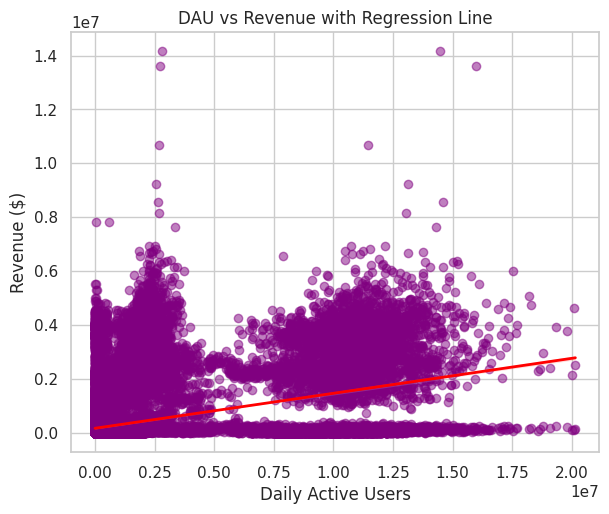

In [ ]:
# Calculate statistical measures
pearson_corr, pearson_p = stats.pearsonr(md_data['DAU'], md_data['Revenue'])
spearman_corr, spearman_p = stats.spearmanr(md_data['DAU'], md_data['Revenue'])

# 3. Visualization
plt.figure(figsize=(15, 12))

# Scatter Plot with Regression Line
plt.subplot(2, 2, 3)
sns.regplot(x='DAU', y='Revenue', data=md_data,
            scatter_kws={'alpha':0.5, 'color':'purple'},
            line_kws={'color':'red', 'linewidth':2})
plt.title('DAU vs Revenue with Regression Line', fontsize=12)
plt.xlabel('Daily Active Users')
plt.ylabel('Revenue ($)')


# Generate Report
report = f"""
DAU & REVENUE CORRELATION ANALYSIS REPORT

- Pearson Correlation: {pearson_corr:.4f} (p-value: {pearson_p:.4f})
  • Interpretation: {'Strong positive correlation' if pearson_corr > 0.7 else
                   'Moderate positive correlation' if pearson_corr > 0.3 else
                   'Weak positive correlation' if pearson_corr > 0 else
                   'No correlation' if pearson_corr == 0 else
                   'Negative correlation'}

- Spearman Rank Correlation: {spearman_corr:.4f} (p-value: {spearman_p:.4f})
  • Interpretation: {'Strong monotonic relationship' if spearman_corr > 0.7 else
                    'Moderate monotonic relationship' if spearman_corr > 0.3 else
                    'Weak monotonic relationship' if spearman_corr > 0 else
                    'No monotonic relationship' if spearman_corr == 0 else
                    'Negative monotonic relationship'}

"""

print(report)



###2.1 Active Value Indicator by DAU & Revenue (AVI0)

In [ ]:
md_data = pd.read_csv("/content/model data.csv")

In [ ]:
#AVI caculation
md_data['AVI'] = np.log1p(md_data['DAU'] * md_data['Revenue'])

In [ ]:
# Eliminate noise: Construct a smooth AVI indicator (3-period moving average)
md_data['AVI_smooth'] = md_data.groupby('Name')['AVI'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)

# sort by Name & Date
md_data = md_data.sort_values(by=['Name', 'Date']).reset_index(drop=True)

# save
md_data.to_csv("ModelData_With_AVI.csv", index=False)

# see data
md_data.head()

Name        Date     DAU    Revenue        AVI  AVI_smooth
0  Dawn of kingdoms  2022-03-29  174110  516004.42  25.221313   25.221313
1  Dawn of kingdoms  2022-03-29  174110   41704.03  22.705796   23.963554
2  Dawn of kingdoms  2022-03-29    7923  516004.42  22.131396   23.352835
3  Dawn of kingdoms  2022-03-29    7923   41704.03  19.615878   21.484357
4  Dawn of kingdoms  2022-03-30  210370  605651.14  25.570683   22.439319

####Visualization

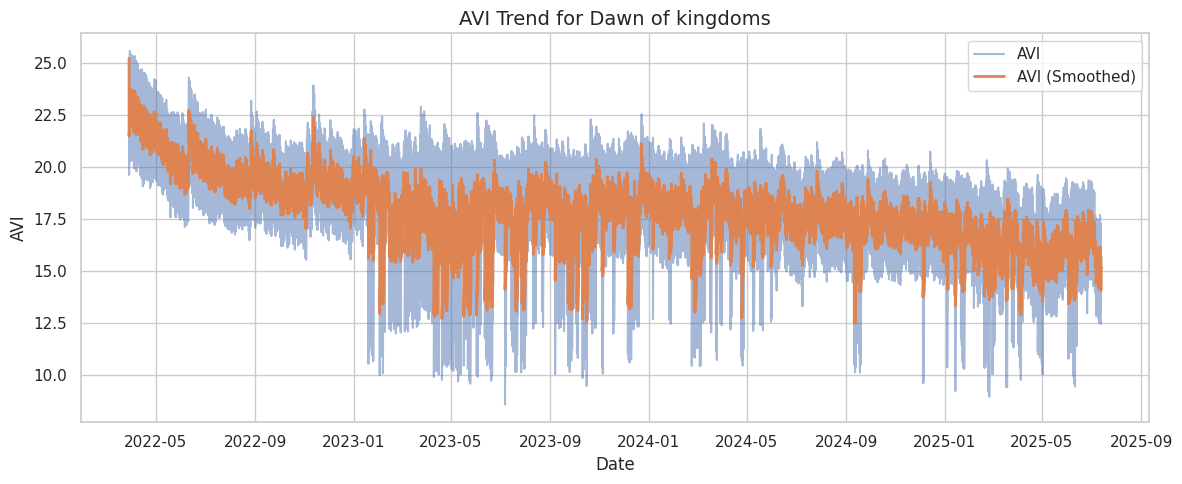

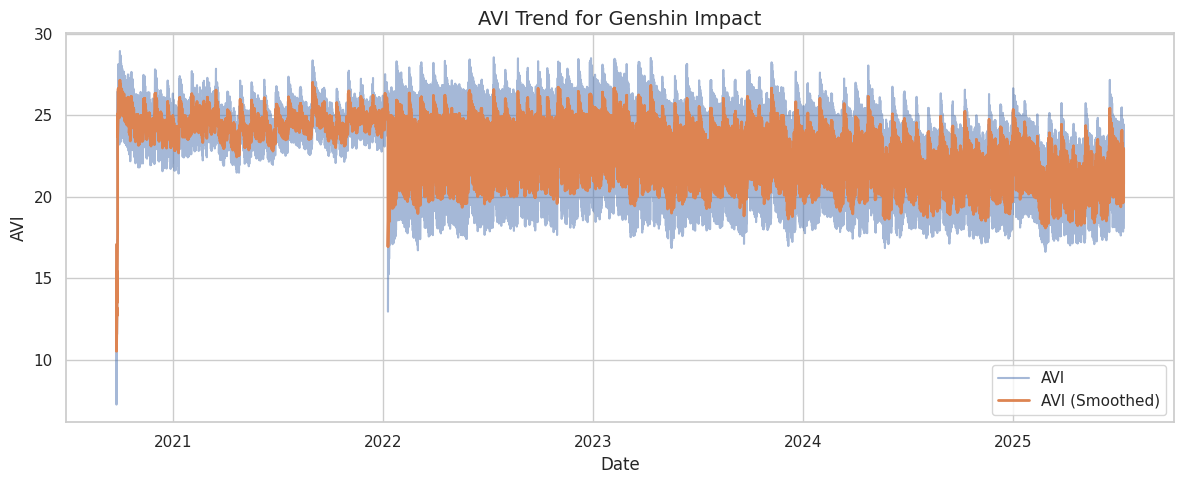

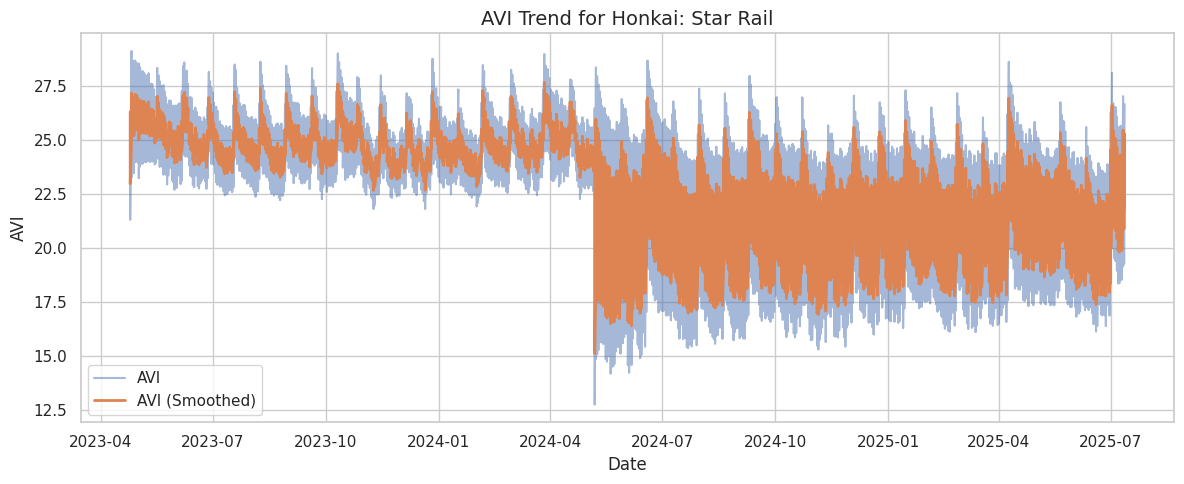

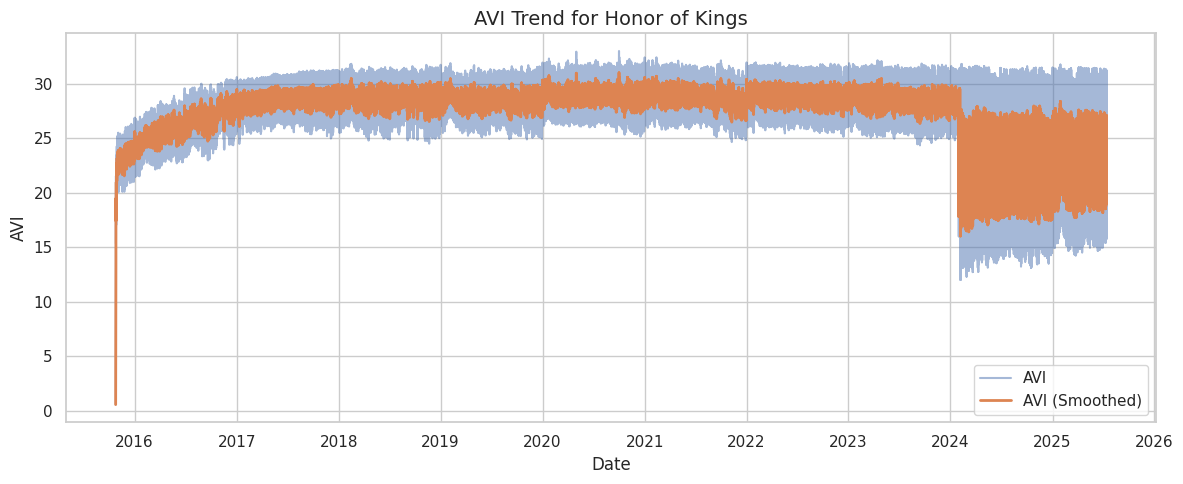

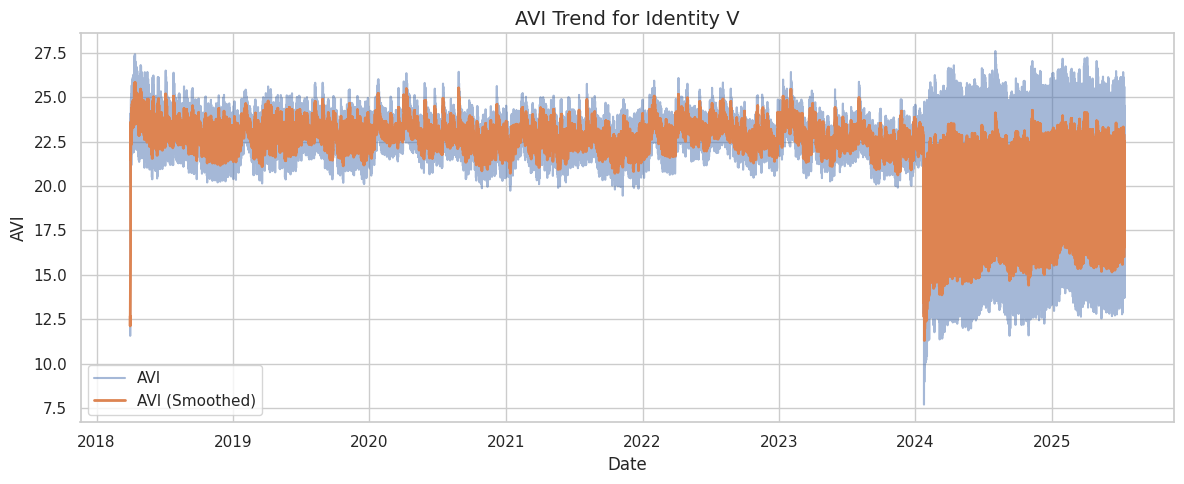

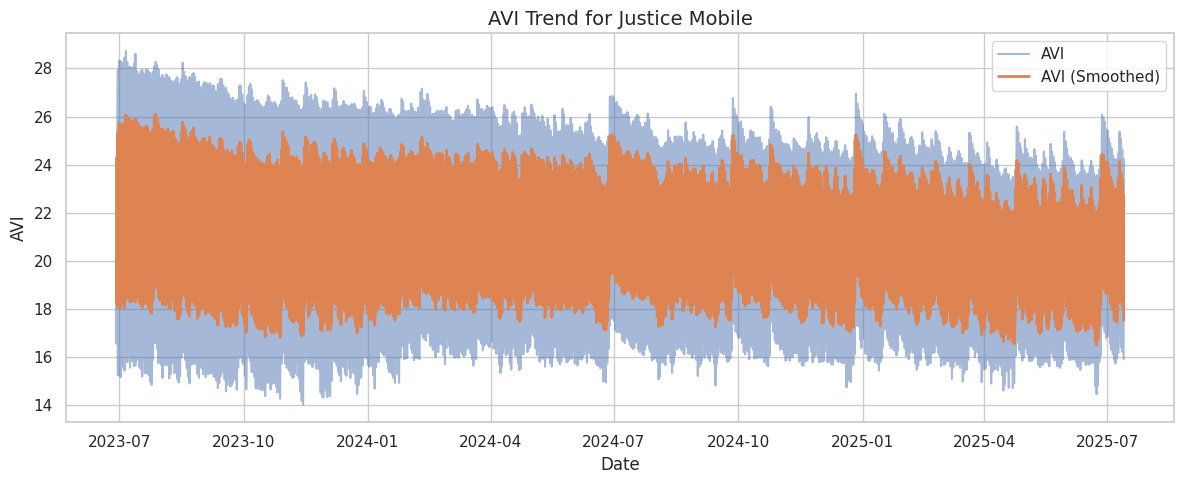

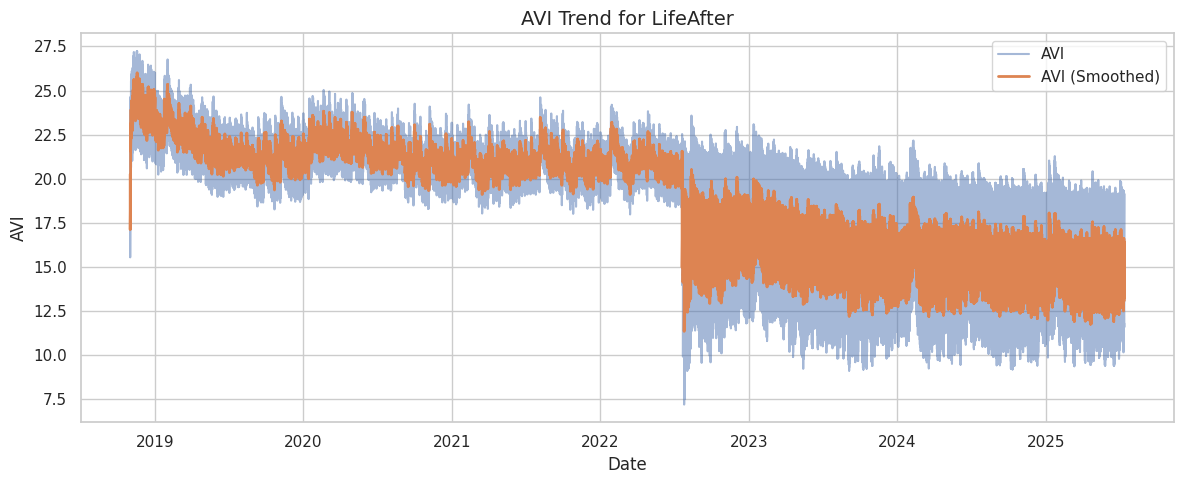

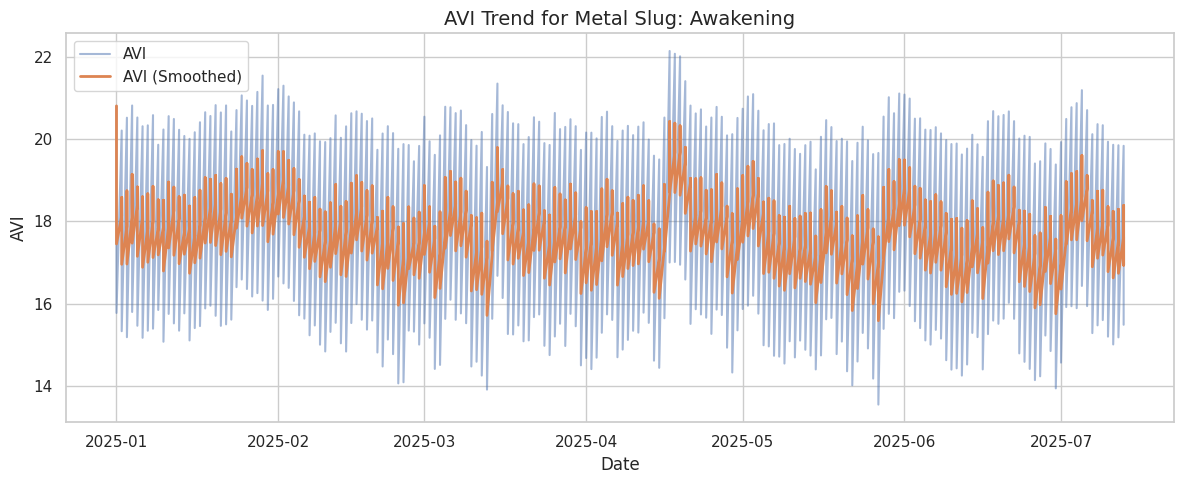

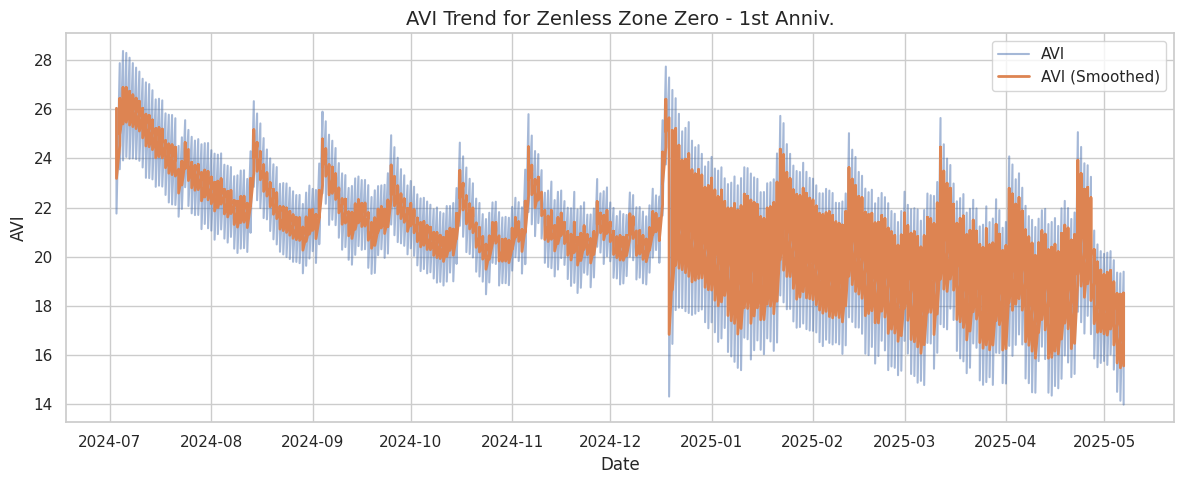

In [ ]:
#Visualization
# style
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'sans-serif'

# access data
games = md_data['Name'].unique()

# Draw for every game
for game in games:
    subset = md_data[md_data['Name'] == game]

    plt.figure(figsize=(12, 5))
    plt.plot(subset['Date'], subset['AVI'], label='AVI', alpha=0.5)
    plt.plot(subset['Date'], subset['AVI_smooth'], label='AVI (Smoothed)', linewidth=2)

    plt.title(f'AVI Trend for {game}', fontsize=14)
    plt.xlabel('Date')
    plt.ylabel('AVI')
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

###2.2 Weekly Aggregation (AVI0)

In [ ]:
md_data['Date'] = pd.to_datetime(md_data['Date'])
md_data = md_data[(md_data['DAU'] > 0) & (md_data['Revenue'] > 0)]

In [ ]:
md_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112357 entries, 0 to 112356
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Name        112357 non-null  object        
 1   Date        112357 non-null  datetime64[ns]
 2   DAU         112357 non-null  int64         
 3   Revenue     112357 non-null  float64       
 4   AVI         112357 non-null  float64       
 5   AVI_smooth  112357 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 5.1+ MB


In [ ]:
# set week
md_data['Week'] = md_data['Date'] - pd.to_timedelta(md_data['Date'].dt.dayofweek, unit='D')

# aggregation by week
weekly_md = md_data.groupby(['Name', 'Week']).agg({
    'DAU': 'mean',          # weekly mean DAU
    'Revenue': 'sum'        # week revenue
}).reset_index()

# caculate Weekly Active Value (WAVI)
weekly_md['WAVI'] = np.log1p(weekly_md['DAU'] * weekly_md['Revenue'])

# smooth moving average (3-week window)
weekly_md['WAVI_smooth'] = weekly_md.groupby('Name')['WAVI'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)

#see
weekly_md.head()



Name       Week           DAU     Revenue       WAVI  \
0  Dawn of kingdoms 2022-03-28  97281.916667  7393367.08  27.301462   
1  Dawn of kingdoms 2022-04-04  71847.714286  8464934.44  27.133747   
2  Dawn of kingdoms 2022-04-11  56306.142857  6696899.02  26.655714   
3  Dawn of kingdoms 2022-04-18  49249.642857  5084670.74  26.246398   
4  Dawn of kingdoms 2022-04-25  48414.714286  4219808.02  26.042859   

   WAVI_smooth  
0    27.301462  
1    27.217605  
2    27.030308  
3    26.678620  
4    26.314991

In [ ]:
# Save
weekly_md.to_csv("Weekly_AVI_Data.csv", index=False)


####Visualization

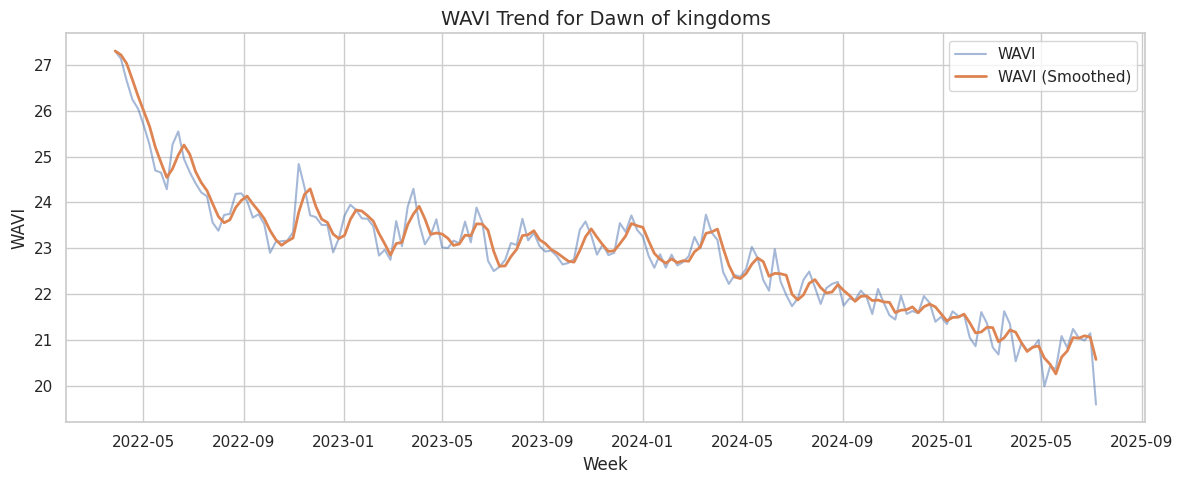

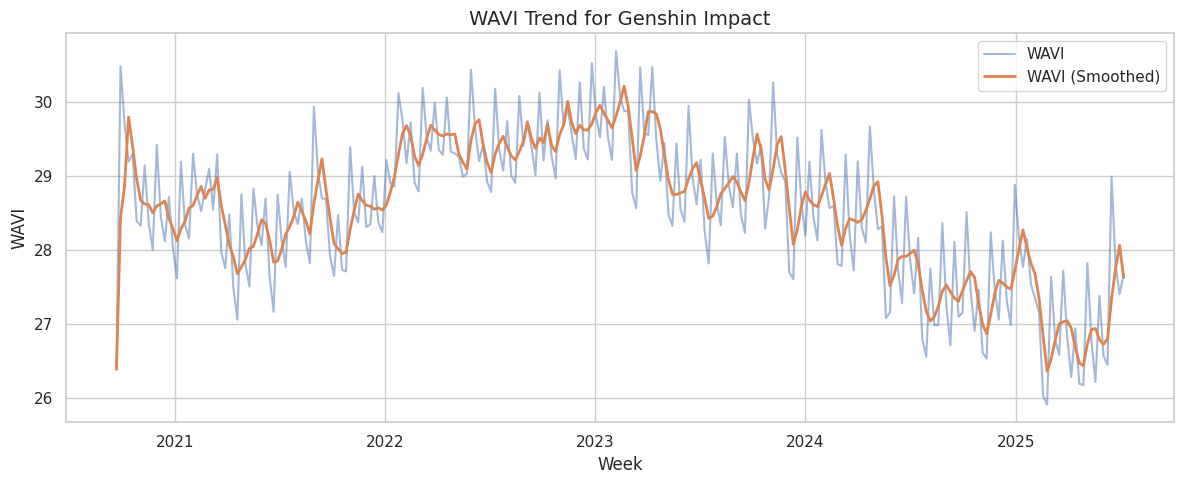

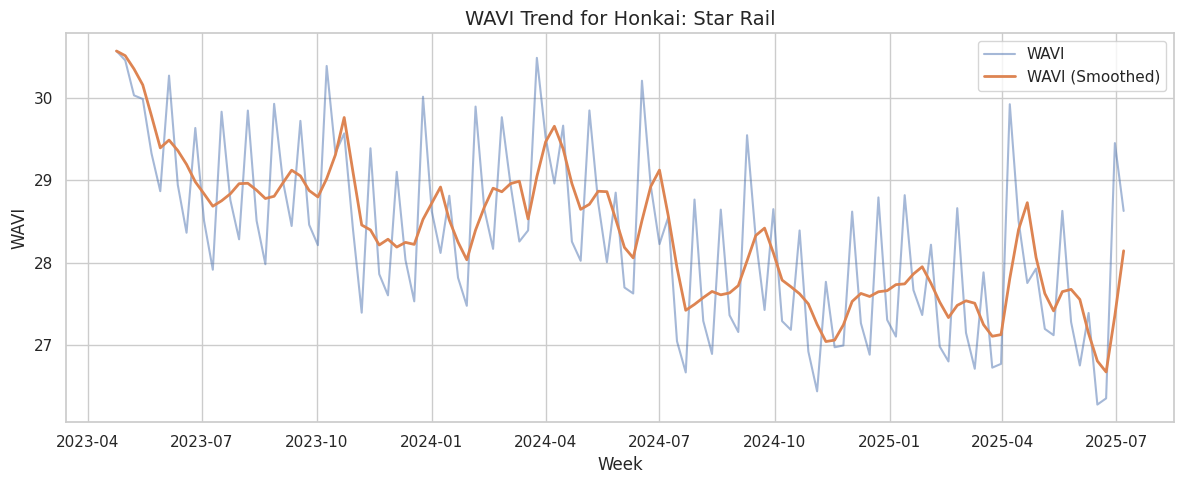

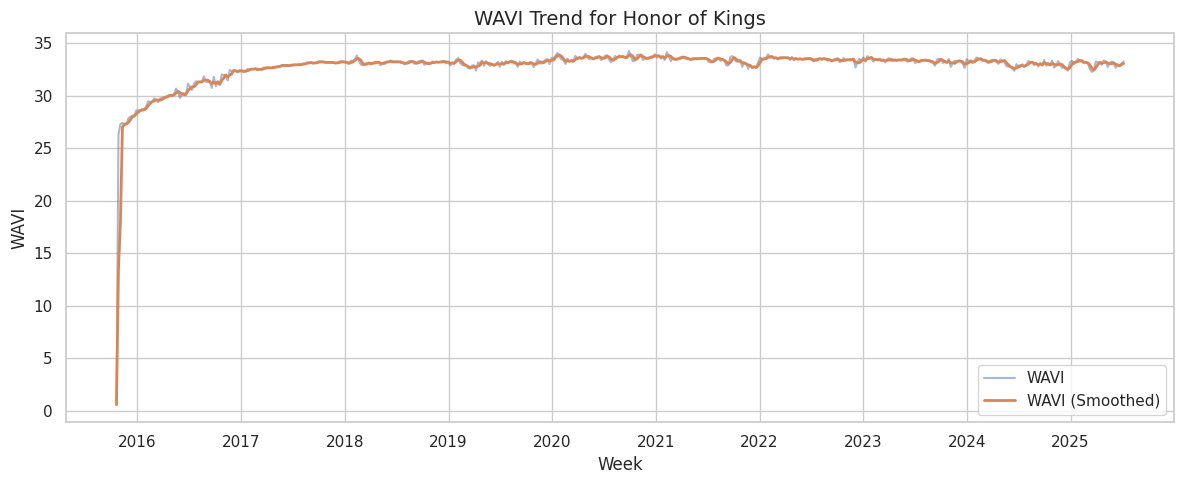

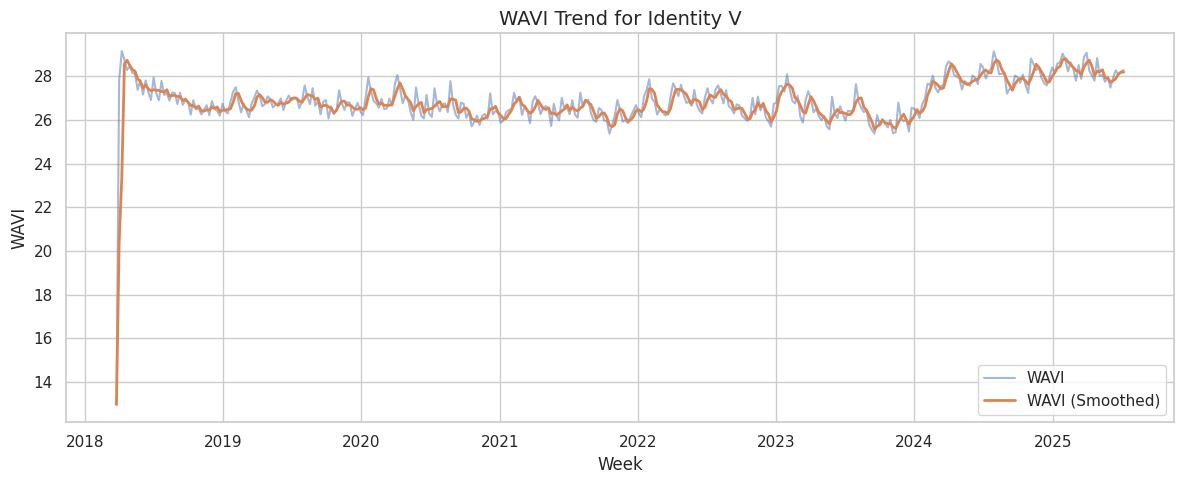

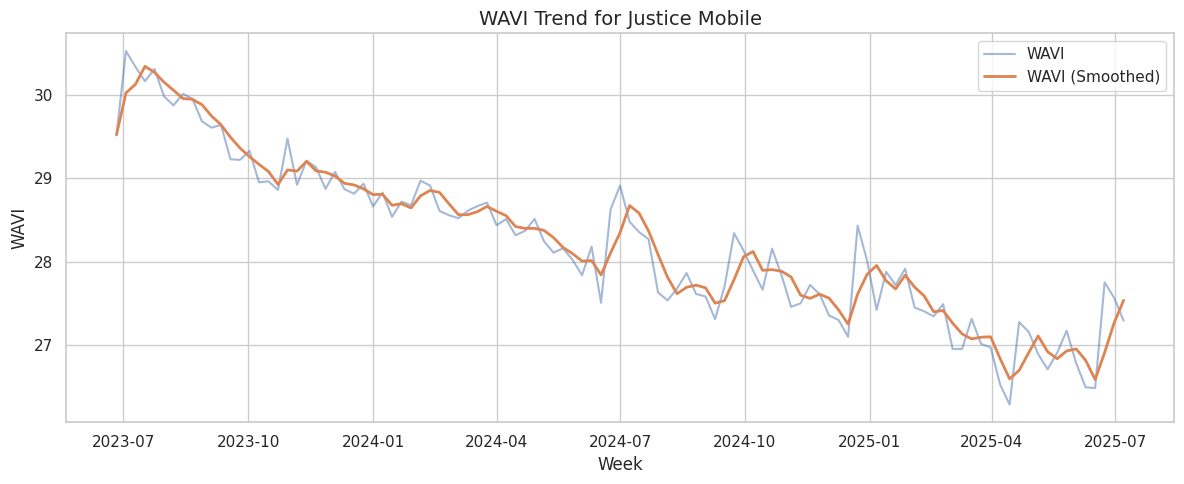

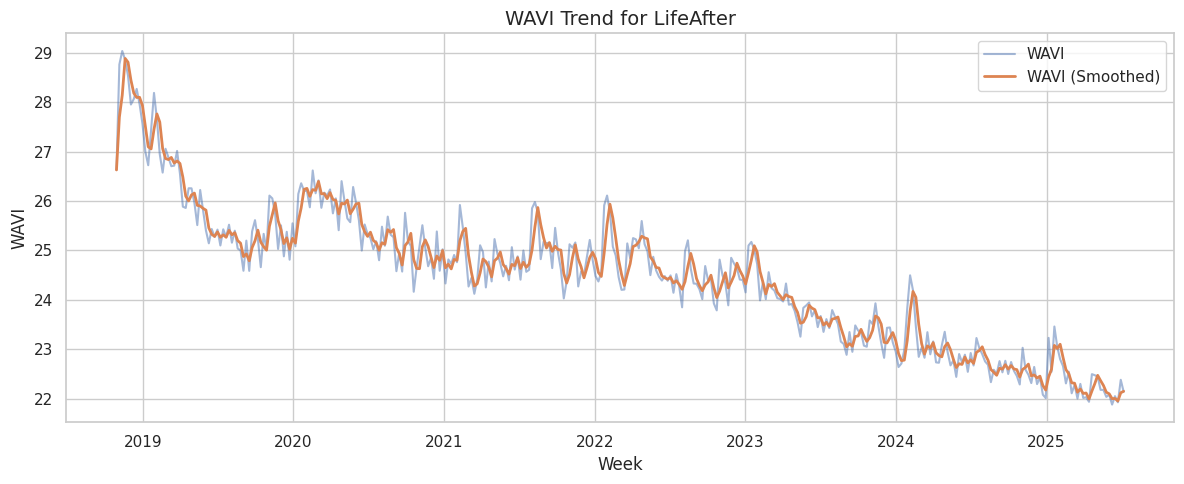

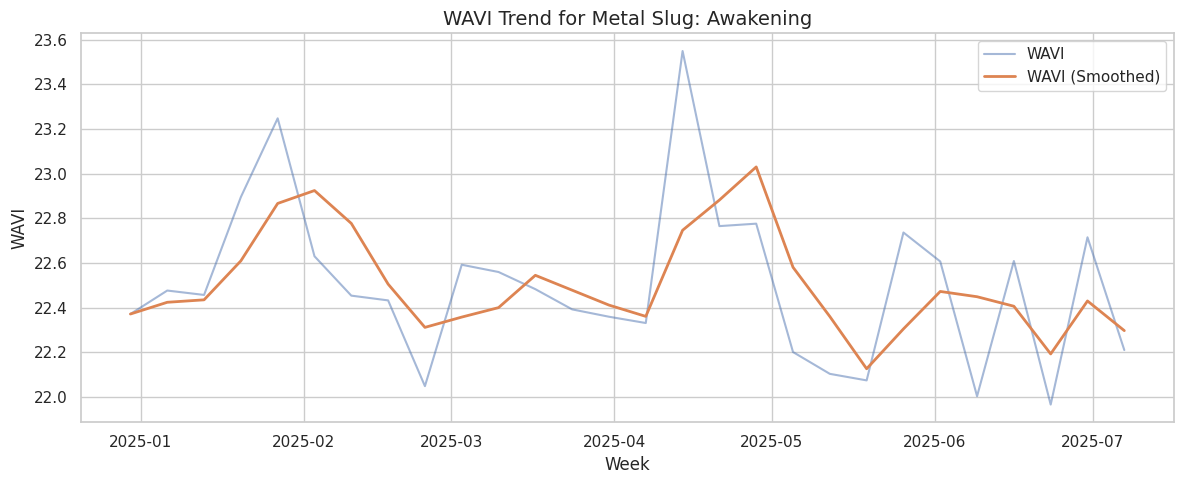

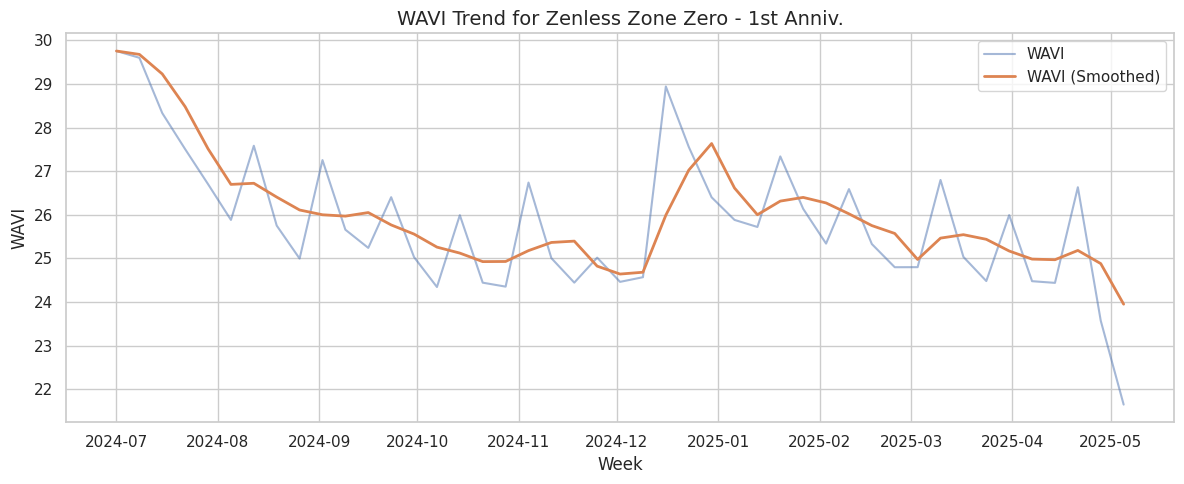

In [ ]:
#Visualization
# style
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'sans-serif'

# access data
games = weekly_md['Name'].unique()

# Draw for every game
for game in games:
    subset = weekly_md[weekly_md['Name'] == game]

    plt.figure(figsize=(12, 5))
    plt.plot(subset['Week'], subset['WAVI'], label='WAVI', alpha=0.5)
    plt.plot(subset['Week'], subset['WAVI_smooth'], label='WAVI (Smoothed)', linewidth=2)

    plt.title(f'WAVI Trend for {game}', fontsize=14)
    plt.xlabel('Week')
    plt.ylabel('WAVI')
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

###2.3(*) Reformulation: Correct odds & weekly Aggregation & Smooth with Moving Average (optional)

In [ ]:
md_data

Name        Date    DAU   Revenue
0       Honor of Kings  2015-10-25      5      0.16
1       Honor of Kings  2015-10-26  91703  25110.71
2       Honor of Kings  2015-10-26  91703   1940.52
3       Honor of Kings  2015-10-26   2391  25110.71
4       Honor of Kings  2015-10-26   2391   1940.52
...                ...         ...    ...       ...
112352       LifeAfter  2025-07-13   7086     51.55
112353       LifeAfter  2025-07-13   2605  21353.64
112354       LifeAfter  2025-07-13   2605   2998.57
112355       LifeAfter  2025-07-13   2605     41.96
112356       LifeAfter  2025-07-13   2605     51.55

[112357 rows x 4 columns]

In [ ]:
md_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112357 entries, 0 to 112356
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Name     112357 non-null  object 
 1   Date     112357 non-null  object 
 2   DAU      112357 non-null  int64  
 3   Revenue  112357 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ MB


In [ ]:
# Define a very small value to avoid log(0)
epsilon = 1e-5

# Set week (truncate to the Monday of each week)
md_data['Week'] = md_data['Date'] - pd.to_timedelta(md_data['Date'].dt.dayofweek, unit='D')

# Weekly aggregation: average DAU and total Revenue
weekly_md_1 = md_data.groupby(['Name', 'Week']).agg({
    'DAU': 'mean',           # Weekly average DAU
    'Revenue': 'sum'         # Weekly total revenue
}).reset_index()

# Calculate Active Value Index 1 (AVI1) with epsilon adjustment
weekly_md_1['AVI1'] = np.log1p(
    weekly_md_1['DAU'].replace(0, epsilon) * weekly_md_1['Revenue'].replace(0, epsilon)
)

# Smooth AVI1 using 3-week moving average
weekly_md_1['AVI1_smooth'] = weekly_md_1.groupby('Name')['AVI1'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)


In [ ]:
weekly_md_1

Name       Week           DAU     Revenue  \
0                   Dawn of kingdoms 2022-03-28  97281.916667  7393367.08   
1                   Dawn of kingdoms 2022-04-04  71847.714286  8464934.44   
2                   Dawn of kingdoms 2022-04-11  56306.142857  6696899.02   
3                   Dawn of kingdoms 2022-04-18  49249.642857  5084670.74   
4                   Dawn of kingdoms 2022-04-25  48414.714286  4219808.02   
...                              ...        ...           ...         ...   
1953  Zenless Zone Zero - 1st Anniv. 2025-04-07  50780.214286   841517.36   
1954  Zenless Zone Zero - 1st Anniv. 2025-04-14  59343.678571   692731.32   
1955  Zenless Zone Zero - 1st Anniv. 2025-04-21  69264.642857  5321682.40   
1956  Zenless Zone Zero - 1st Anniv. 2025-04-28  15465.500000  1115576.08   
1957  Zenless Zone Zero - 1st Anniv. 2025-05-05   7255.750000   347655.00   

           AVI1  AVI1_smooth  
0     27.301462    27.301462  
1     27.133747    27.217605  
2     26.655714    27.030308  
3     26.246398    26.678620  
4     26.042859    26.314991  
...         ...          ...  
1953  24.478224    24.984623  
1954  24.439498    24.970653  
1955  26.632990    25.183571  
1956  23.571249    24.881246  
1957  21.648515    23.950918  

[1958 rows x 6 columns]

In [ ]:
# Save
weekly_md_1.to_csv("Weekly_AVI1_Data.csv", index=False)

####Visualization

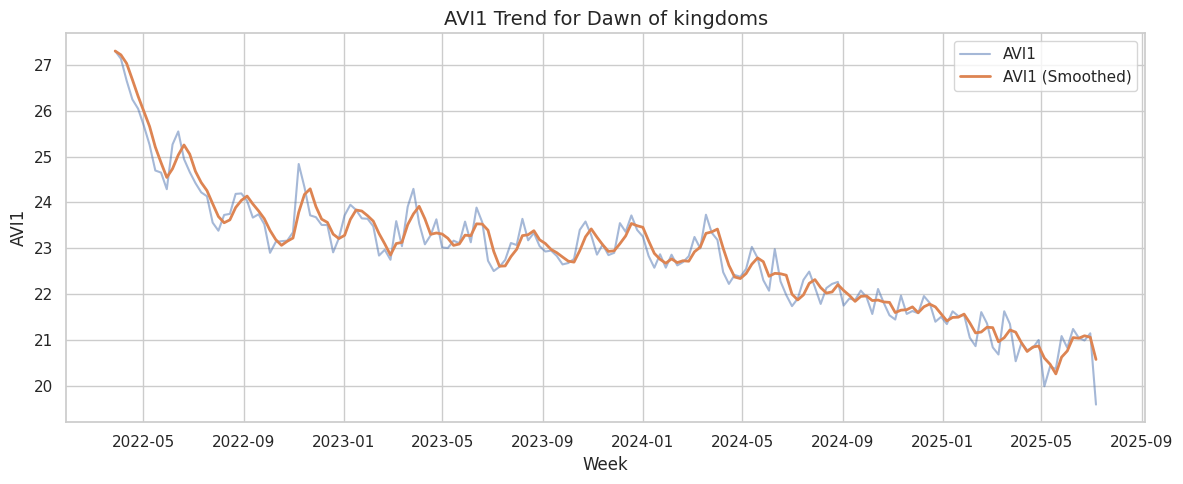

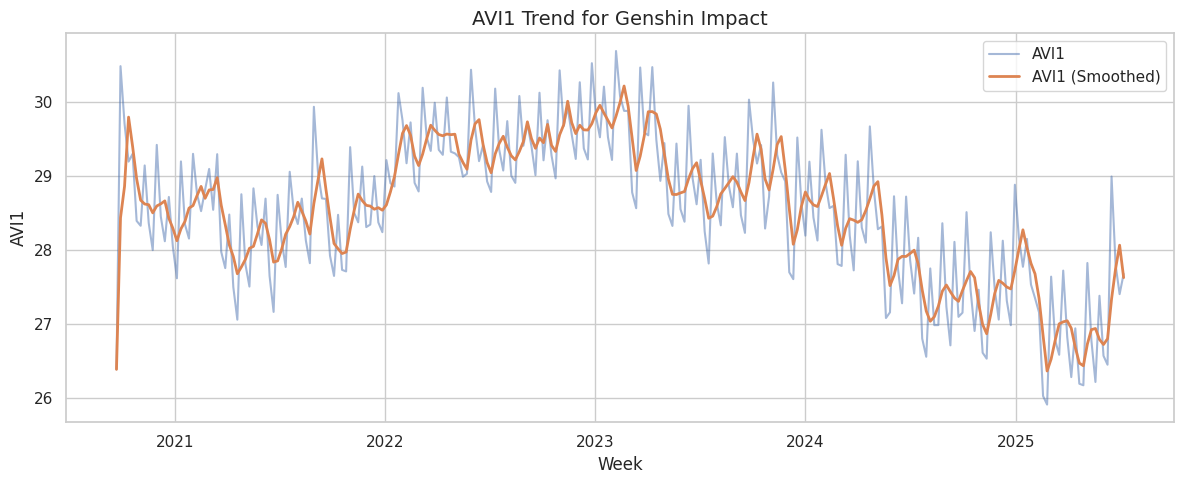

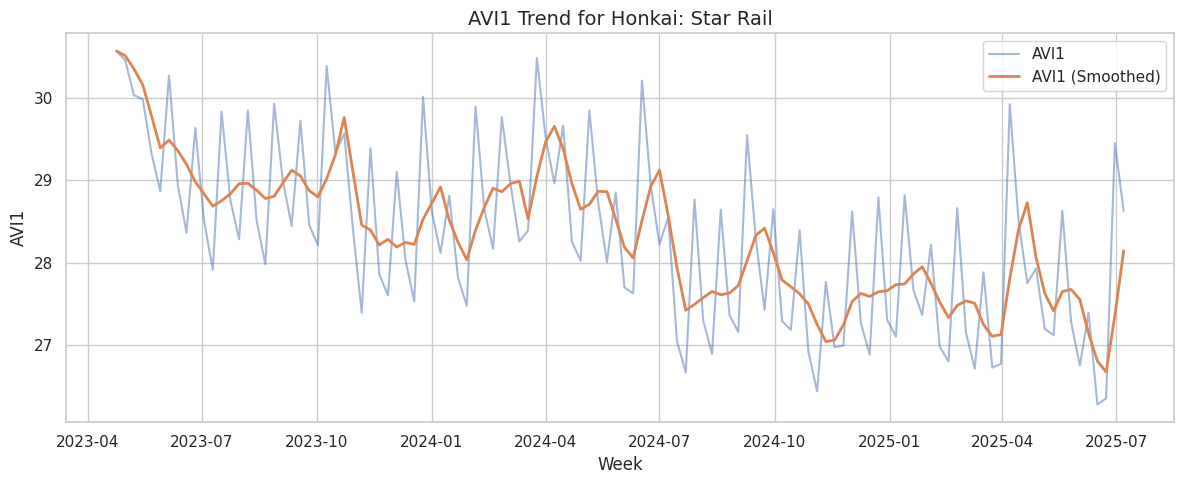

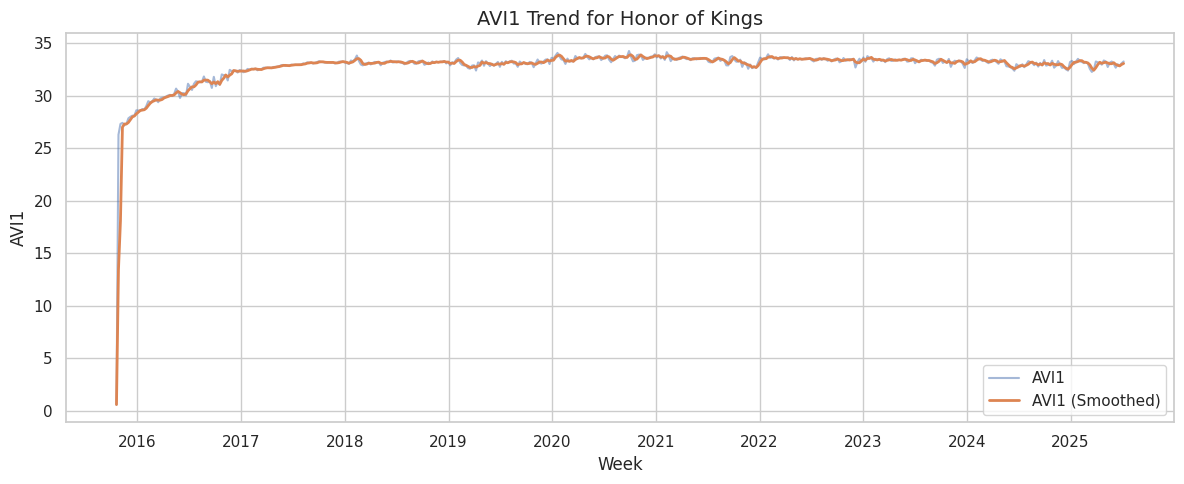

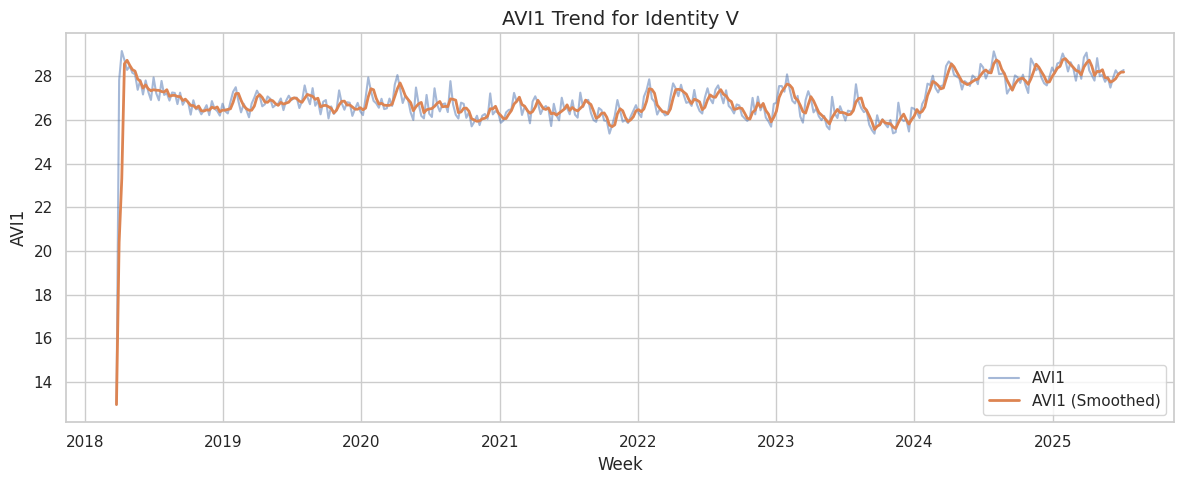

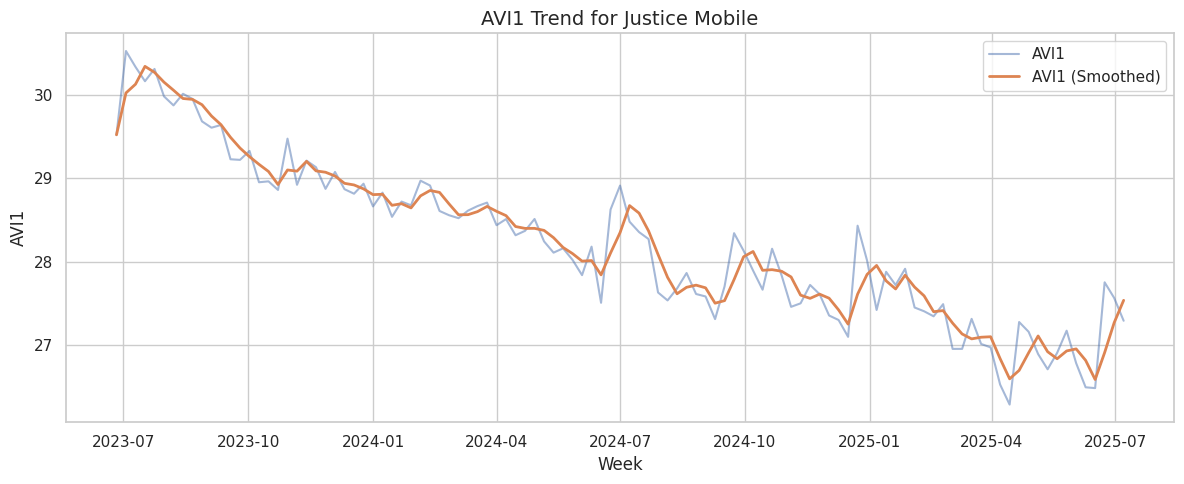

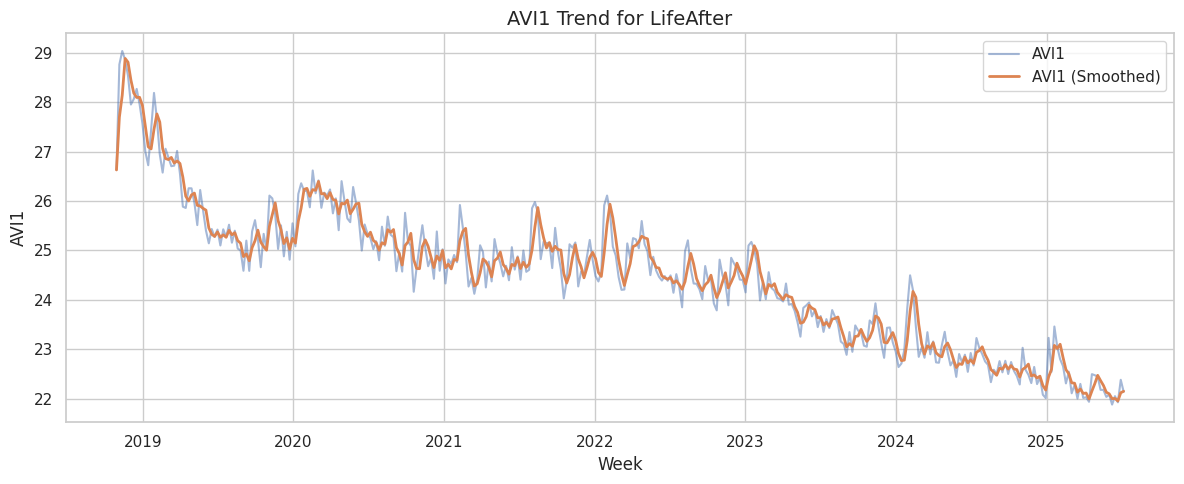

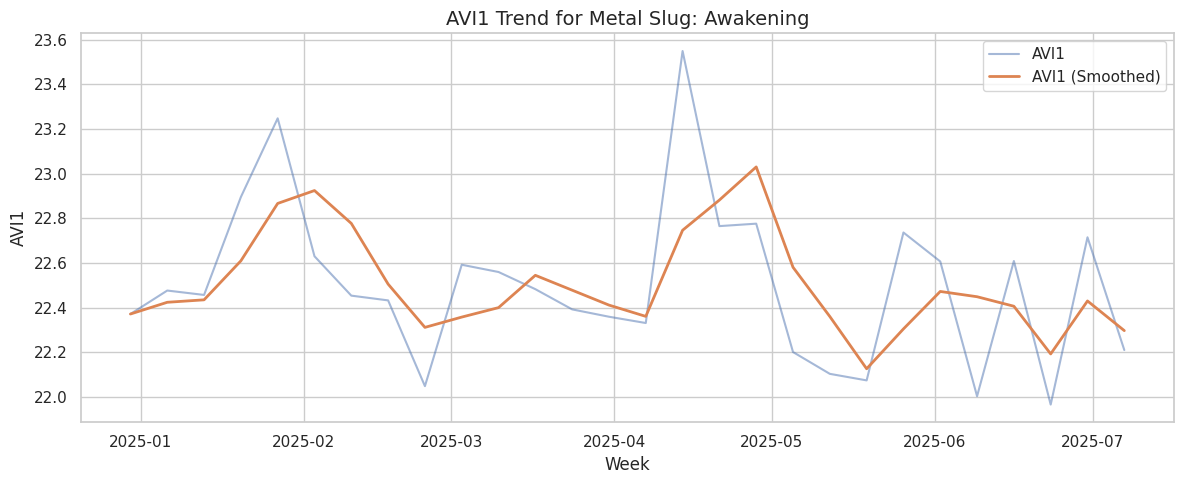

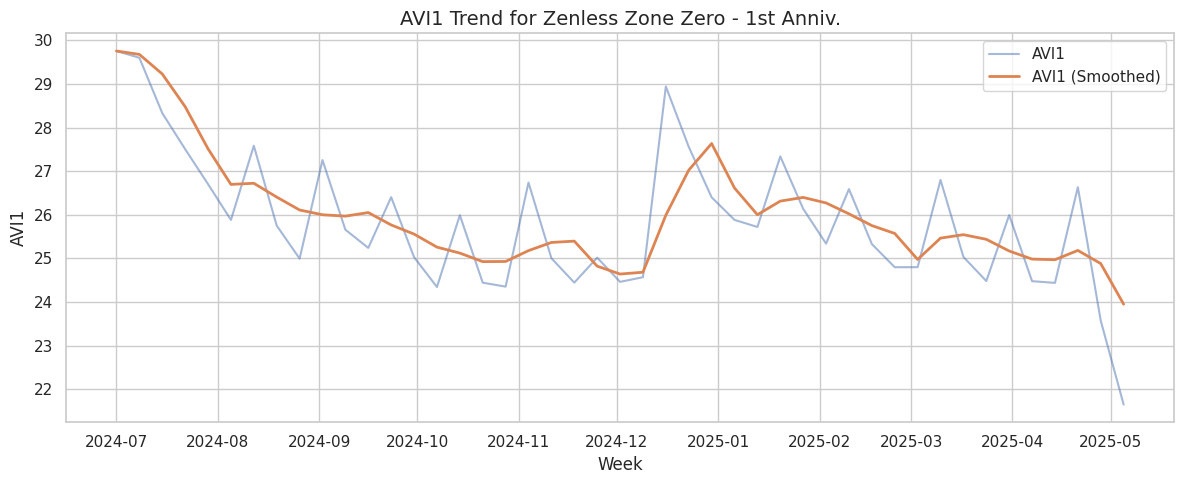

In [ ]:
#Visualization
# style
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'sans-serif'

# access data
games = weekly_md_1['Name'].unique()

# Draw for every game
for game in games:
    subset = weekly_md_1[weekly_md_1['Name'] == game]

    plt.figure(figsize=(12, 5))
    plt.plot(subset['Week'], subset['AVI1'], label='AVI1', alpha=0.5)
    plt.plot(subset['Week'], subset['AVI1_smooth'], label='AVI1 (Smoothed)', linewidth=2)

    plt.title(f'AVI1 Trend for {game}', fontsize=14)
    plt.xlabel('Week')
    plt.ylabel('AVI1')
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

###2.4 Conclustion

The result indicates that AVI1,which introduced a small positive value instead of 1, dosen't make a big difference to the AVI value under condition that the AVI was processed with weekly aggregation.Thus, we choose WAVI_smooth as the Final AVI indicator.

In [ ]:
#see
weekly_md.head()

Name       Week           DAU     Revenue       WAVI  \
0  Dawn of kingdoms 2022-03-28  97281.916667  7393367.08  27.301462   
1  Dawn of kingdoms 2022-04-04  71847.714286  8464934.44  27.133747   
2  Dawn of kingdoms 2022-04-11  56306.142857  6696899.02  26.655714   
3  Dawn of kingdoms 2022-04-18  49249.642857  5084670.74  26.246398   
4  Dawn of kingdoms 2022-04-25  48414.714286  4219808.02  26.042859   

   WAVI_smooth  
0    27.301462  
1    27.217605  
2    27.030308  
3    26.678620  
4    26.314991

In [ ]:
df_AVI = weekly_md[['Name', 'Week', 'WAVI_smooth']].rename(columns={'WAVI_smooth': 'AVI'})
df_AVI.head()

Name       Week        AVI
0  Dawn of kingdoms 2022-03-28  27.301462
1  Dawn of kingdoms 2022-04-04  27.217605
2  Dawn of kingdoms 2022-04-11  27.030308
3  Dawn of kingdoms 2022-04-18  26.678620
4  Dawn of kingdoms 2022-04-25  26.314991

In [ ]:
df_AVI.to_csv("Final_AVI_Data.csv", index=False)

#3. HMM Model Training

###3.1 Model Training

In [ ]:
df_AVI = pd.read_csv("/content/Final_AVI_Data.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/Final_AVI_Data.csv'

In [ ]:
# Create a copy of the input DataFrame for stage labeling
df_train = df_AVI.copy()

# Initialize a list to store results
results = []

# Define the number of lifecycle stages (HMM hidden states)
n_states = 4

# Loop through each game and train an HMM model individually
for game in df_train['Name'].unique():
    subset = df_train[df_train['Name'] == game].copy()

    # Use AVI as the input feature and reshape to 2D
    X = subset[['AVI']].values

    # Train the HMM model
    model = GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=1000, random_state=42)
    model.fit(X)

    # Predict the hidden states (lifecycle stages)
    hidden_states = model.predict(X)
    subset['State'] = hidden_states

    # Append the result for this game
    results.append(subset)

# Combine the results from all games
hmm_result = pd.concat(results).reset_index(drop=True)

In [ ]:
# see
hmm_result[['Name', 'Week', 'AVI', 'State']]

Name        Week        AVI  State
0                   Dawn of kingdoms  2022-03-28  27.301462      0
1                   Dawn of kingdoms  2022-04-04  27.217605      0
2                   Dawn of kingdoms  2022-04-11  27.030308      0
3                   Dawn of kingdoms  2022-04-18  26.678620      0
4                   Dawn of kingdoms  2022-04-25  26.314991      0
...                              ...         ...        ...    ...
1953  Zenless Zone Zero - 1st Anniv.  2025-04-07  24.984623      1
1954  Zenless Zone Zero - 1st Anniv.  2025-04-14  24.970653      1
1955  Zenless Zone Zero - 1st Anniv.  2025-04-21  25.183571      1
1956  Zenless Zone Zero - 1st Anniv.  2025-04-28  24.881246      1
1957  Zenless Zone Zero - 1st Anniv.  2025-05-05  23.950918      3

[1958 rows x 4 columns]

In [ ]:
# save
hmm_result.to_csv("HMM_Labeled_Lifecycle.csv", index=False)

#4. HMM result Visualization

###4.1. pre-processing

In [ ]:
#import data result
hmm_result = pd.read_csv("/content/HMM_Labeled_Lifecycle.csv")
hmm_result

Name        Week        AVI  State
0                   Dawn of kingdoms  2022-03-28  27.301462      0
1                   Dawn of kingdoms  2022-04-04  27.217605      0
2                   Dawn of kingdoms  2022-04-11  27.030308      0
3                   Dawn of kingdoms  2022-04-18  26.678620      0
4                   Dawn of kingdoms  2022-04-25  26.314991      0
...                              ...         ...        ...    ...
1953  Zenless Zone Zero - 1st Anniv.  2025-04-07  24.984623      1
1954  Zenless Zone Zero - 1st Anniv.  2025-04-14  24.970653      1
1955  Zenless Zone Zero - 1st Anniv.  2025-04-21  25.183571      1
1956  Zenless Zone Zero - 1st Anniv.  2025-04-28  24.881246      1
1957  Zenless Zone Zero - 1st Anniv.  2025-05-05  23.950918      3

[1958 rows x 4 columns]

### 4.2 result Visualization: Final

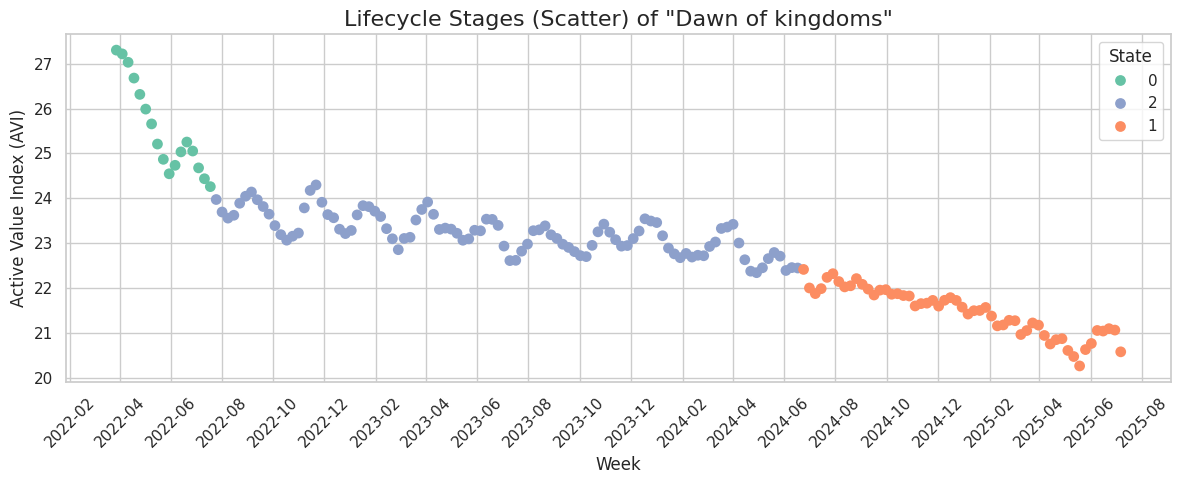

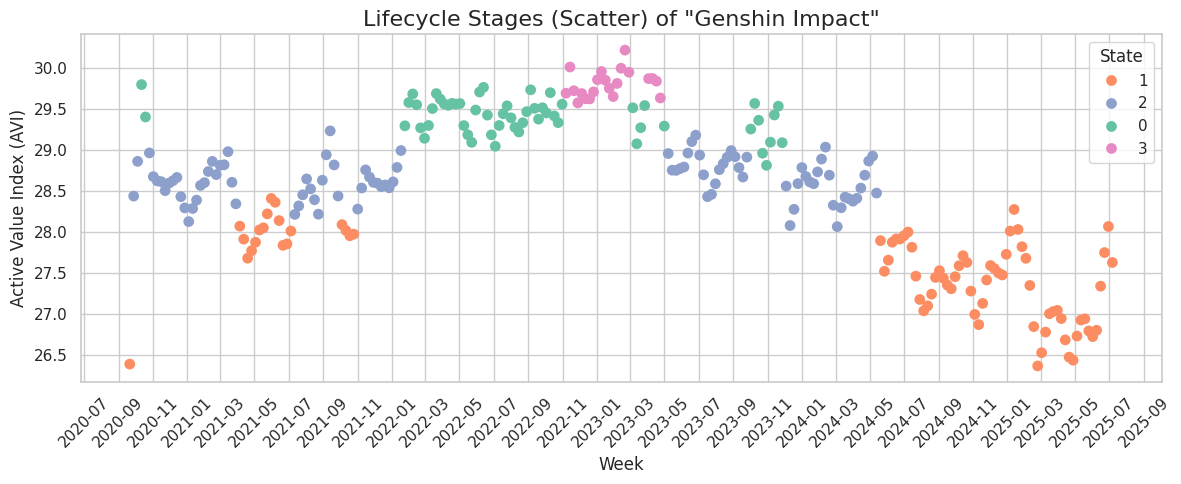

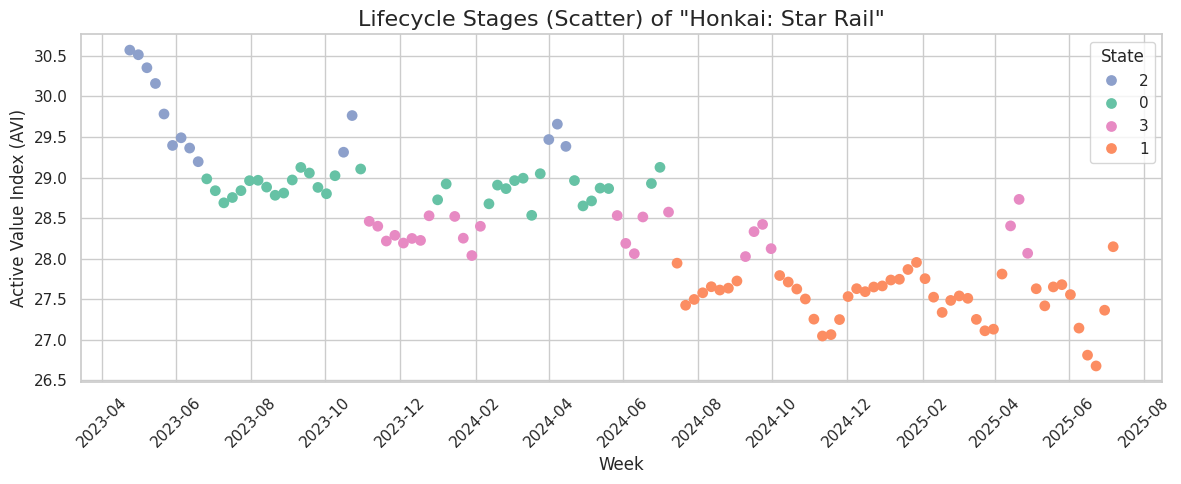

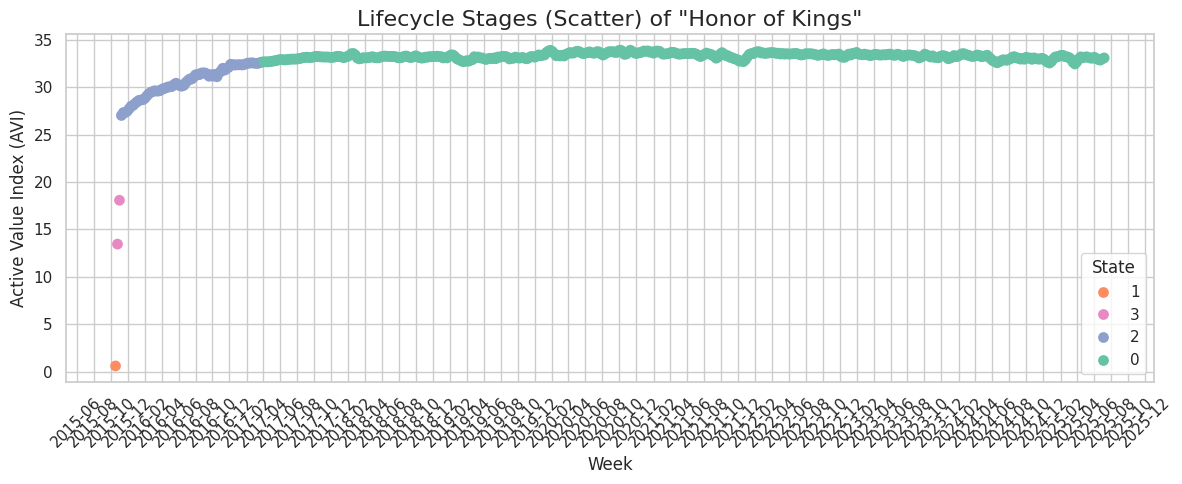

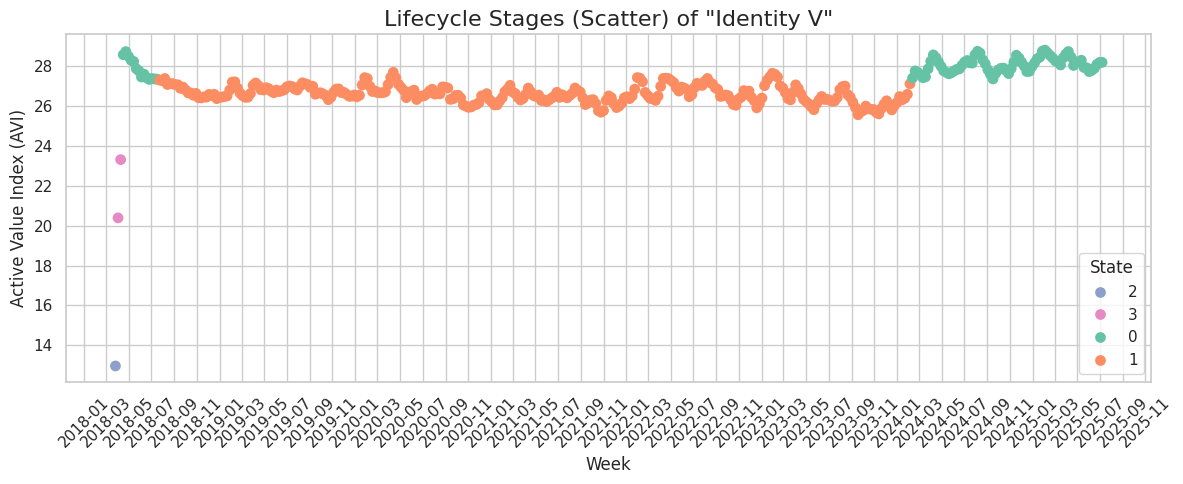

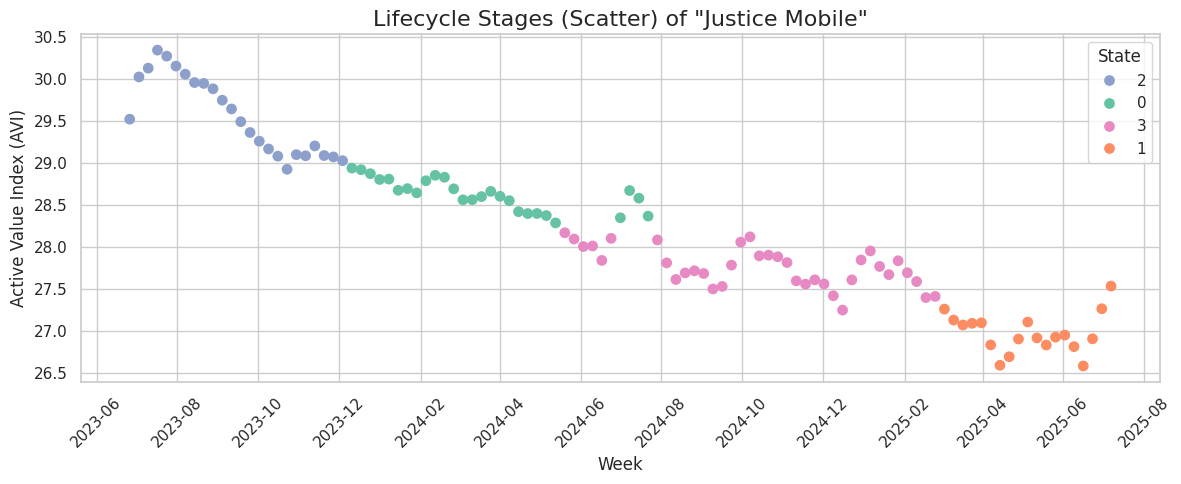

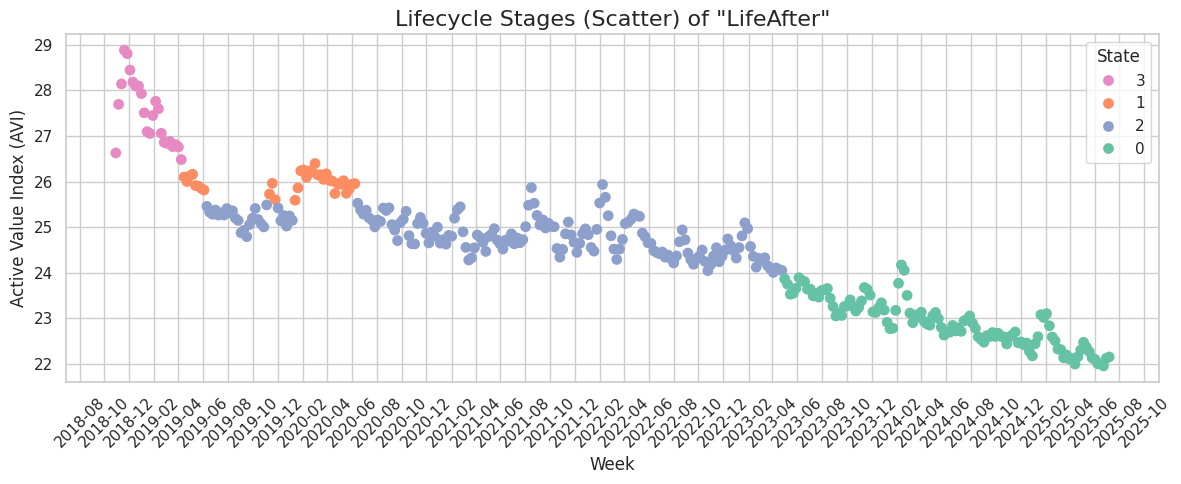

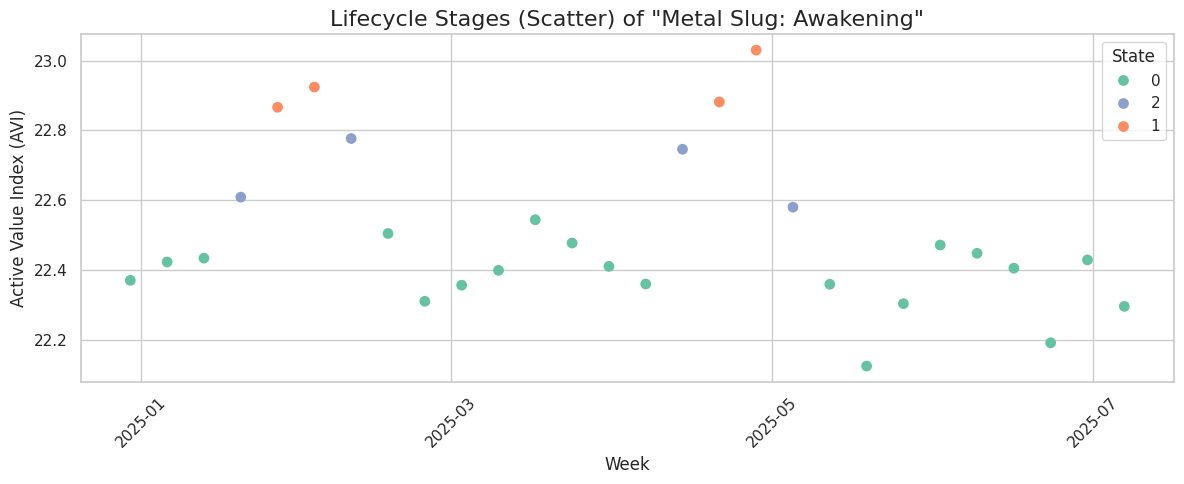

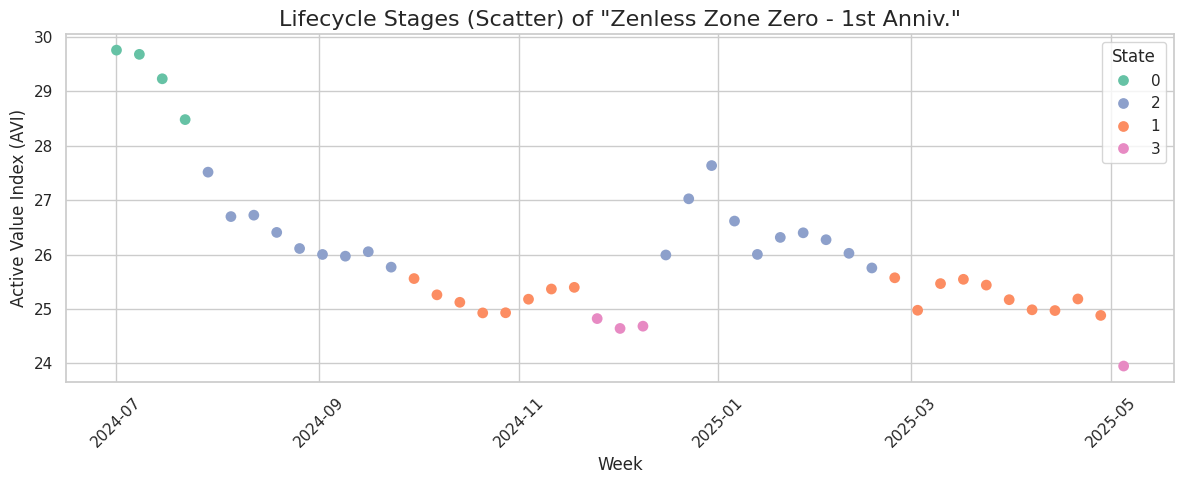

In [ ]:
# Set style
sns.set(style='whitegrid')

# Color palette for HMM states
state_palette = {
    "0": "#66c2a5",  # soft green
    "1": "#fc8d62",  # orange
    "2": "#8da0cb",  # blue
    "3": "#e78ac3"   # pink
}

# Ensure Week column is datetime
hmm_result['Week'] = pd.to_datetime(hmm_result['Week'])

# Convert State to string for consistent legend
hmm_result['State'] = hmm_result['State'].astype(str)

# Loop to draw for each game
for game in hmm_result['Name'].unique():
    subset = hmm_result[hmm_result['Name'] == game].copy()

    plt.figure(figsize=(12, 5))

    # Scatter plot by State
    sns.scatterplot(
        data=subset,
        x='Week',
        y='AVI',
        hue='State',
        palette=state_palette,
        s=60,
        edgecolor=None,
        linewidth=0
    )

    # Format x-axis ticks
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)

    # Titles and labels
    plt.title(f'Lifecycle Stages (Scatter) of "{game}"', fontsize=16)
    plt.xlabel('Week')
    plt.ylabel('Active Value Index (AVI)')
    plt.legend(title='State')  # show numerical state directly
    plt.tight_layout()
    plt.show()


###4.3 Stage Route Visual

####1.all route

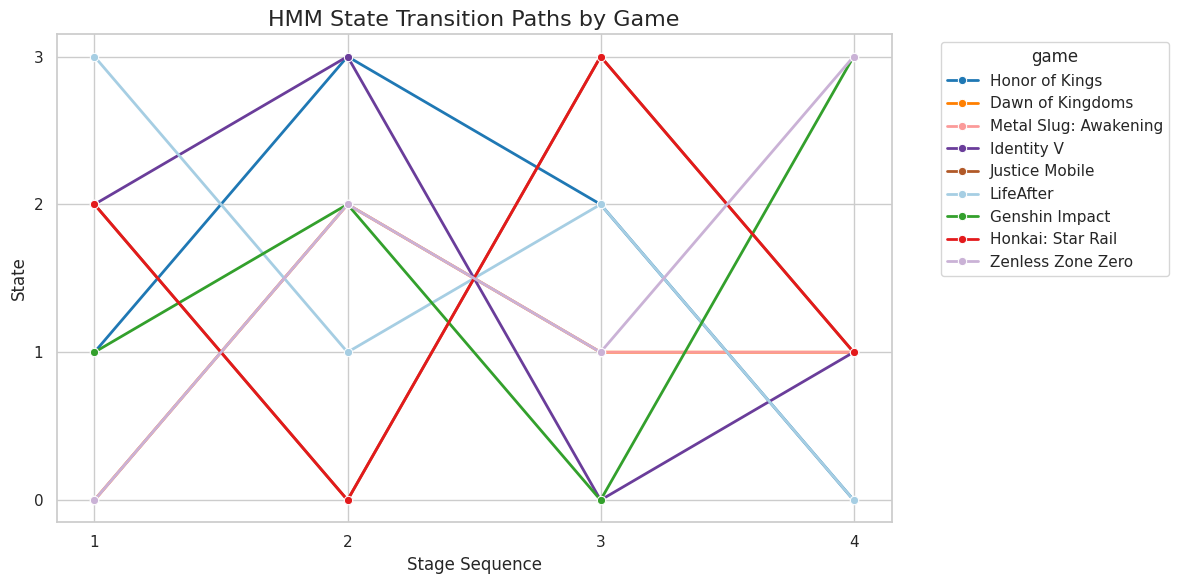

In [ ]:
# read Excel
df = pd.read_excel("/content/stage route.xlsx")

# to_numeric
df['stage'] = pd.to_numeric(df['stage'], errors='coerce')
df['state'] = pd.to_numeric(df['state'], errors='coerce')

# style
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
game_palette = {
    "Honor of Kings": "#1f78b4",     # blue
    "Dawn of Kingdoms": "#ff7f00",   # orange
    "Genshin Impact": "#33a02c",     # green
    "Honkai: Star Rail": "#e31a1c",  # red
    "Identity V": "#6a3d9a",         # purple
    "Justice Mobile": "#b15928",     # brown
    "LifeAfter": "#a6cee3",         # light blue
    "Metal Slug: Awakening": "#fb9a99",  # pink
    "Zenless Zone Zero": "#cab2d6"   # light purple
}

# draw for all
sns.lineplot(
    data=df,
    x='stage',
    y='state',
    hue='game',
    palette=game_palette,
    marker='o',
    linewidth=2,
    markersize=6
)

# title&label
plt.title('HMM State Transition Paths by Game', fontsize=16)
plt.xlabel('Stage Sequence')
plt.ylabel('State')
plt.legend(title='game', bbox_to_anchor=(1.05, 1), loc='upper left')

# Xstick
plt.xticks(range(int(df['stage'].min()), int(df['stage'].max()) + 1))
plt.yticks(sorted(df['state'].unique()))

plt.tight_layout()
plt.show()

####2. Seperate route

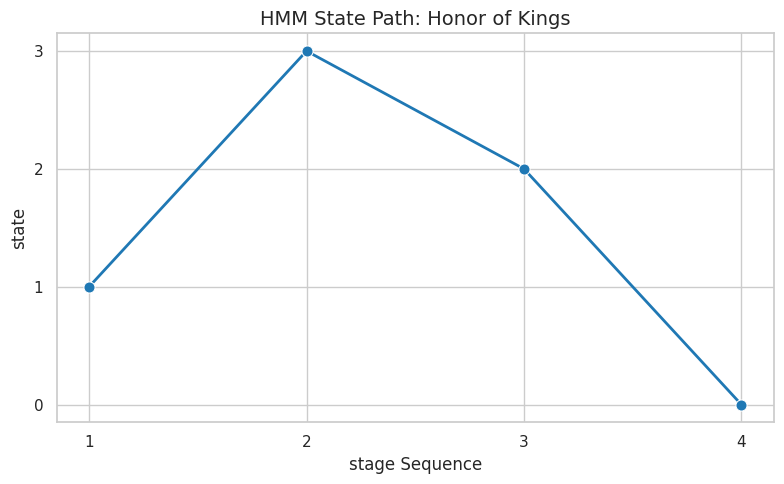

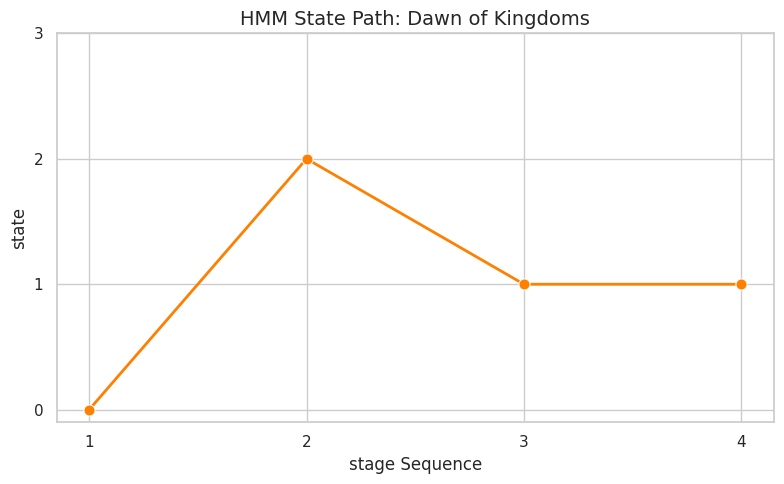

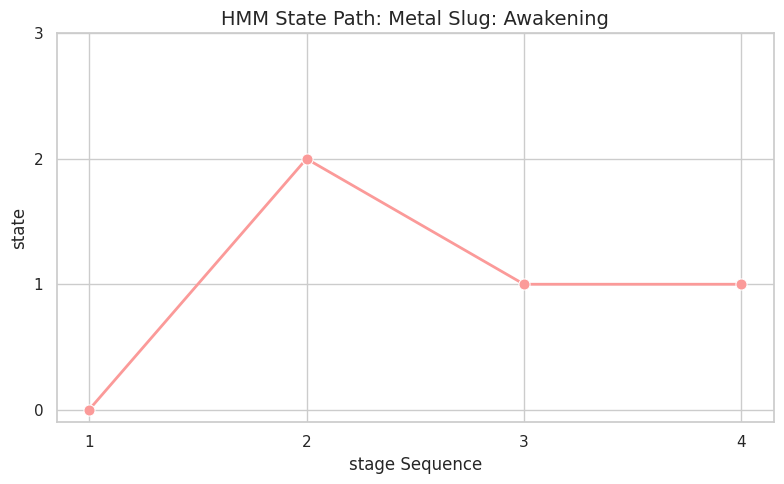

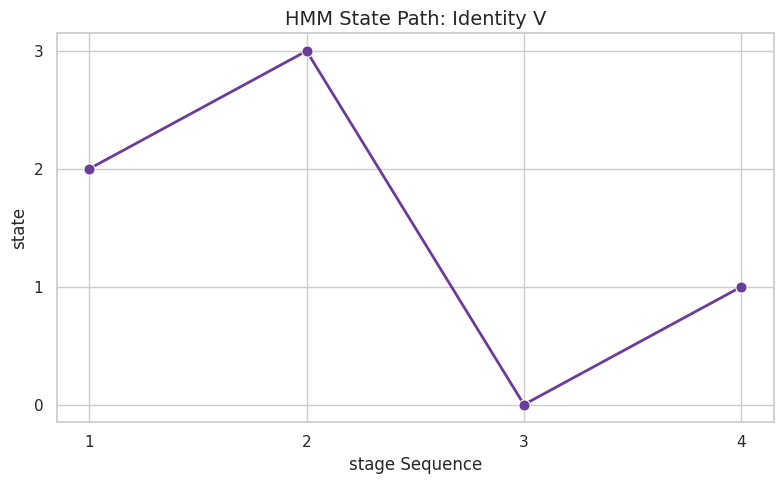

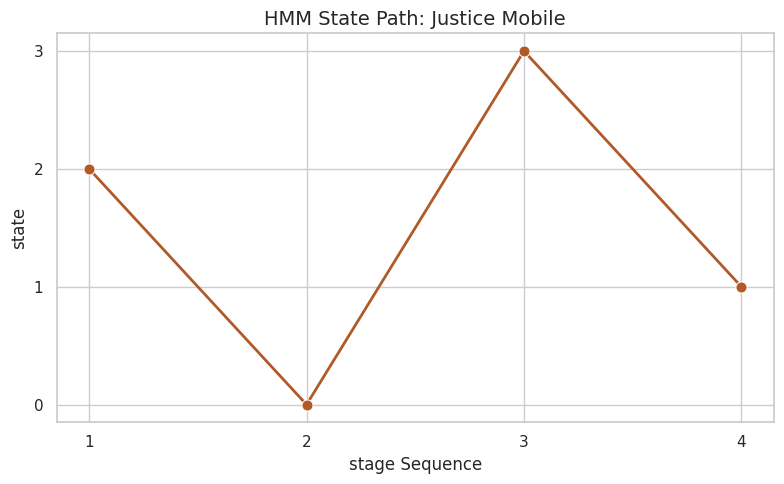

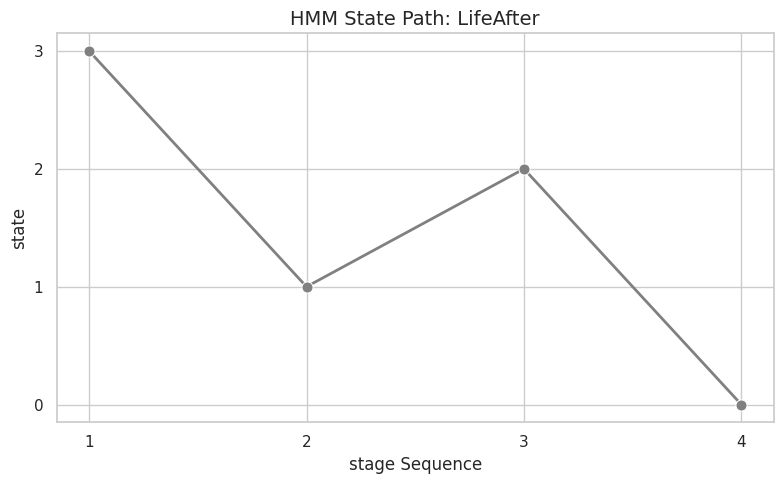

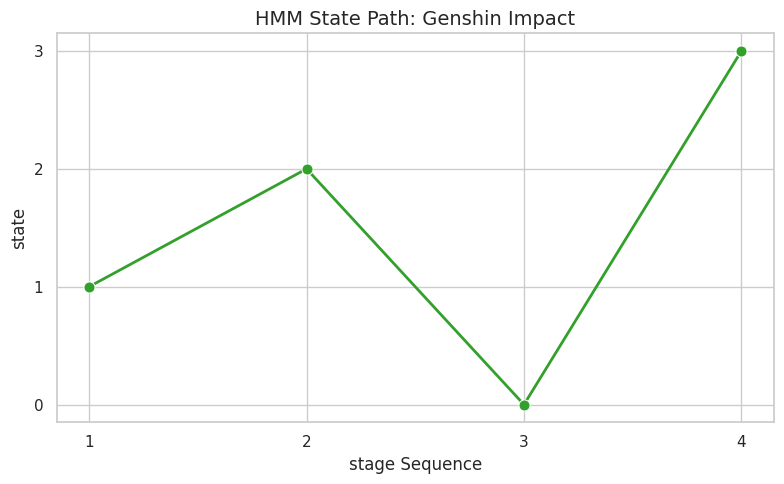

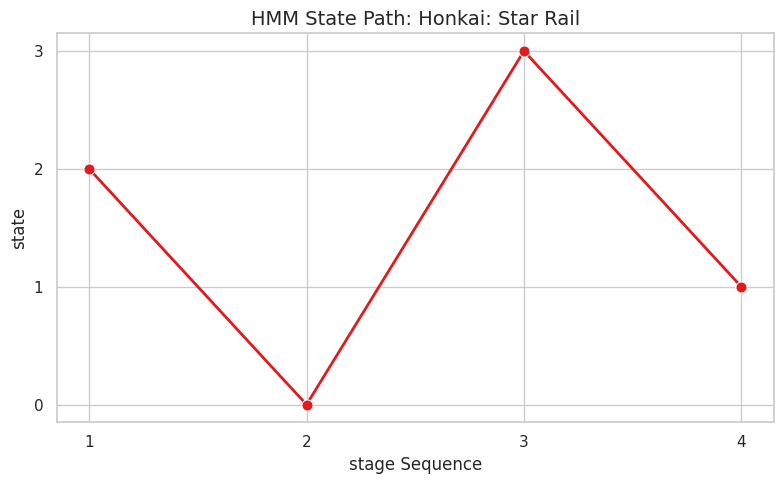

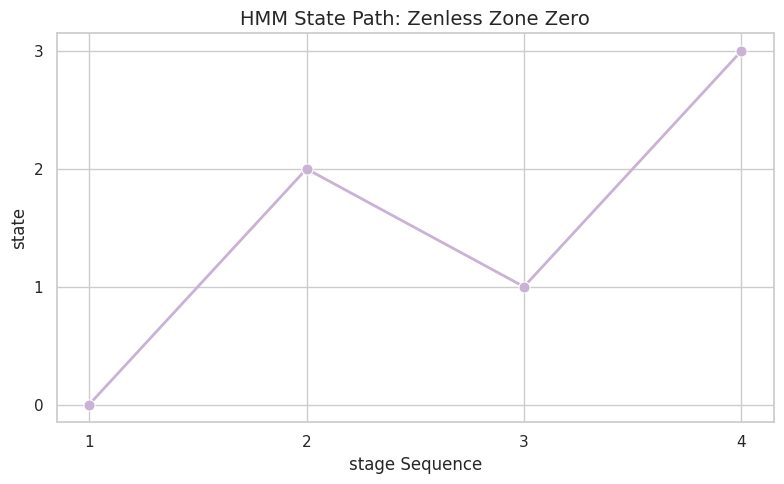

In [ ]:
# read Excel
df = pd.read_excel("/content/stage route.xlsx")

# to_numeric
df['stage'] = pd.to_numeric(df['stage'], errors='coerce')
df['state'] = pd.to_numeric(df['state'], errors='coerce')

# style
sns.set(style='whitegrid')
game_palette = {
    "Honor of Kings": "#1f78b4",     # blue
    "Dawn of Kingdoms": "#ff7f00",   # orange
    "Genshin Impact": "#33a02c",     # green
    "Honkai: Star Rail": "#e31a1c",  # red
    "Identity V": "#6a3d9a",         # purple
    "Justice Mobile": "#b15928",     # brown
    "Life After": "#a6cee3",         # light blue
    "Metal Slug: Awakening": "#fb9a99",  # pink
    "Zenless Zone Zero": "#cab2d6"   # light purple
}

# draw for every game
for game in df['game'].unique():
    subset = df[df['game'] == game].copy()

    plt.figure(figsize=(8, 5))
    sns.lineplot(
        data=subset,
        x='stage',
        y='state',
        marker='o',
        color=game_palette.get(game, "gray"),  # apply palette
        linewidth=2,
        markersize=8
    )

    # title&label
    plt.title(f'HMM State Path: {game}', fontsize=14)
    plt.xlabel('stage Sequence')
    plt.ylabel('state')

    # Xstick
    plt.xticks(range(int(subset['stage'].min()), int(subset['stage'].max()) + 1))
    plt.yticks(sorted(df['state'].unique()))

    plt.tight_layout()
    plt.show()


#5. Case Study for HoYoMix

###5.1 Data Preprocessing

In [ ]:
hmm_result = pd.read_csv("/content/HMM_Labeled_Lifecycle.csv")
hmm_result['Week'] = pd.to_datetime(hmm_result['Week'])
hmm_result['State'] = hmm_result['State'].astype(str)

In [ ]:
genshin_updates = pd.read_excel("/content/genshin_calender.xlsx")
honkai_updates = pd.read_excel("/content/honkai_calender.xlsx")

# game name
genshin_updates['Game'] = "Genshin Impact"
honkai_updates['Game'] = "Honkai: Star Rail"

# to datetime
genshin_updates['Release_Date'] = pd.to_datetime(genshin_updates['Release_Date'])
honkai_updates['Release_Date'] = pd.to_datetime(honkai_updates['Release_Date'])

# merge
updates_df = pd.concat([genshin_updates, honkai_updates], ignore_index=True)

# to
updates_df['Week'] = updates_df['Release_Date'].dt.to_period('W').apply(lambda r: r.start_time)

### 5.2 Visualization

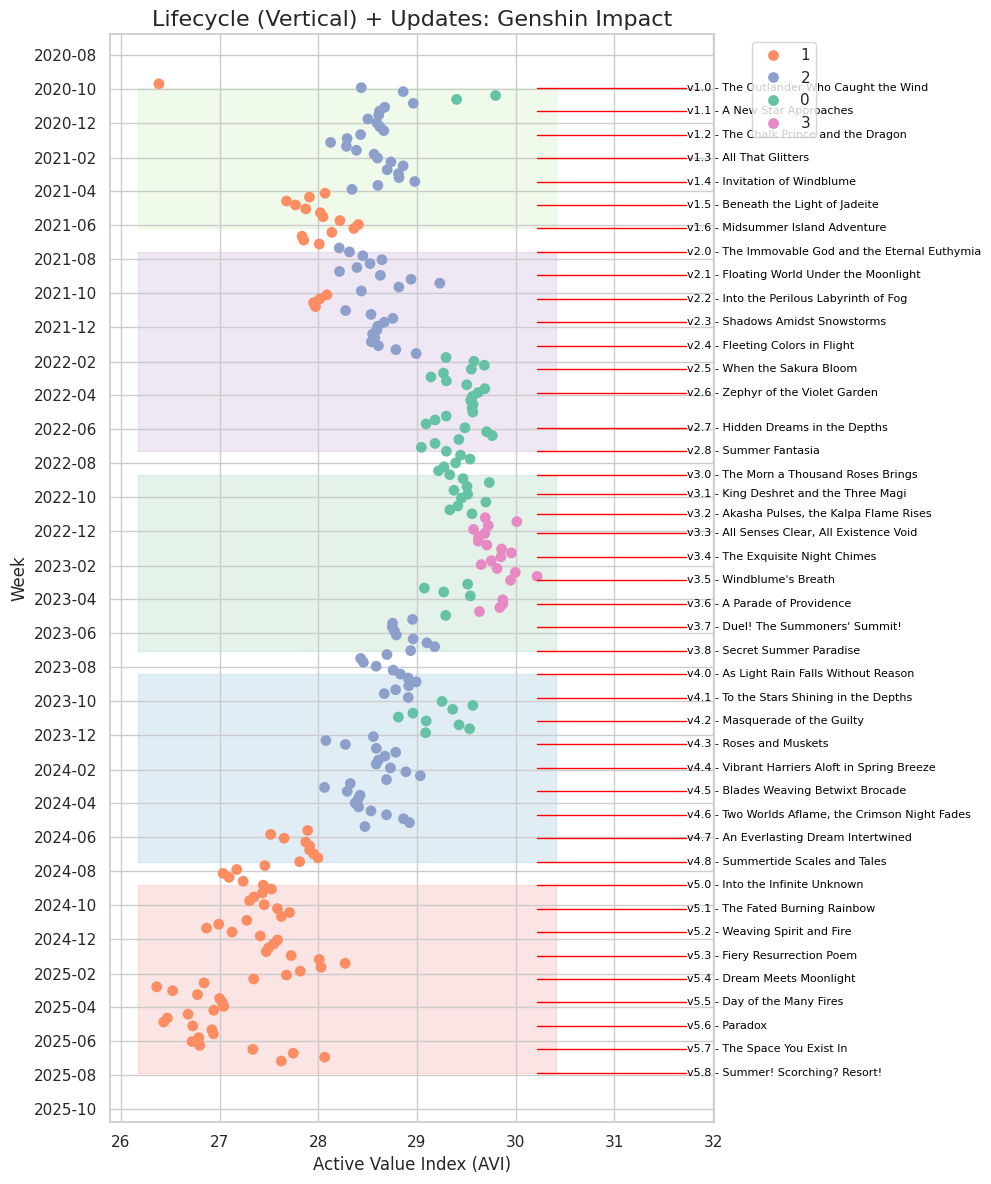

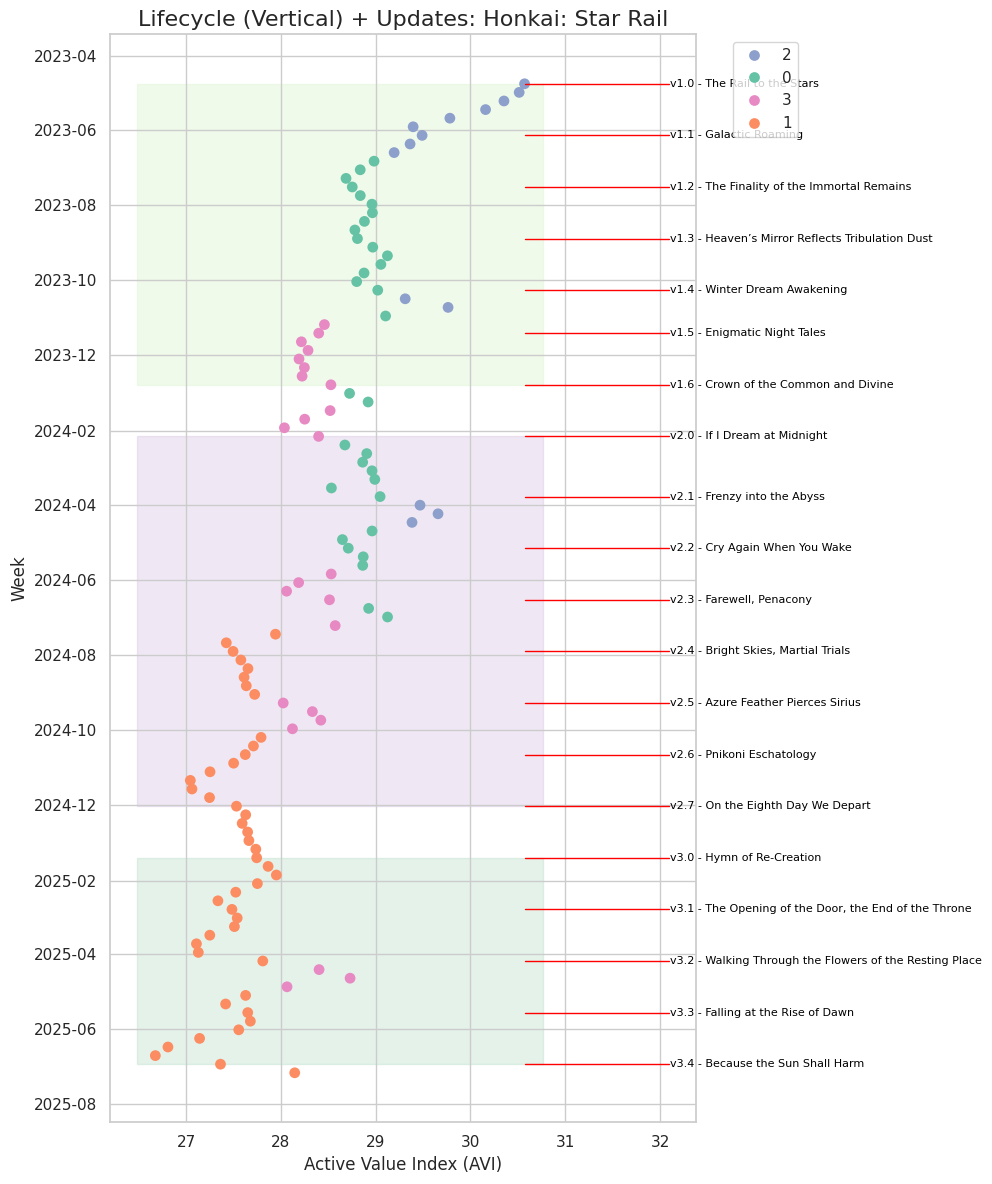

In [ ]:
#style setting
state_palette = {
    "0": "#66c2a5",  # green
    "1": "#fc8d62",  # orange
    "2": "#8da0cb",  # blue
    "3": "#e78ac3"   # pink
}

sns.set(style='whitegrid')

for game in ["Genshin Impact", "Honkai: Star Rail"]:
    subset = hmm_result[hmm_result['Name'] == game].copy()
    game_updates = updates_df[updates_df['Game'] == game].copy()

    plt.figure(figsize=(10, 12))

    # HMM scatters
    sns.scatterplot(
        data=subset,
        x='AVI',
        y='Week',
        hue='State',
        palette=state_palette,
        s=60,
        edgecolor=None,
        linewidth=0,
        legend='brief'
    )

    # background color
    ax = plt.gca()
    ymin, ymax = ax.get_ylim()

    # library for version color
    version_bg_colors = {
        "1": "#d0f0c0",  # light green
        "2": "#cdb4db",  # pruple
        "3": "#a8d5ba",  # green
        "4": "#9ac6e0",  # blue
        "5": "#f4a6a6"   # red
    }

    # group and color by version
    for prefix, color in version_bg_colors.items():
        # version number
        filtered = game_updates[game_updates['Version'].astype(str).str.startswith(prefix)]
        if filtered.empty:
            continue
        # apply version update to week date
        min_week = filtered['Week'].min()
        max_week = filtered['Week'].max()

        # draw color shape
        rect = patches.Rectangle(
            (ax.get_xlim()[0], max_week),
            width=ax.get_xlim()[1] - ax.get_xlim()[0],
            height=min_week - max_week,
            color=color,
            alpha=0.3,
            zorder=0
        )
        ax.add_patch(rect)

    # redline for version update
    max_avi = subset['AVI'].max()
    line_x_start = max_avi
    line_x_end = max_avi * 1.05

    for _, row in game_updates.iterrows():
        # draw line
        plt.plot([line_x_start, line_x_end], [row['Week'], row['Week']], color='red', linewidth=1)

        # add text
        plt.text(
            line_x_end + 0.01,  # location for text
            row['Week'],
            f"v{row['Version']} - {row['Title']}",
            va='center',
            fontsize=8,
            color='black'
        )

    # xtick setting
    plt.gca().yaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.gca().yaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().invert_yaxis()
    plt.xticks(rotation=0)

    plt.title(f'Lifecycle (Vertical) + Updates: {game}', fontsize=16)
    plt.xlabel('Active Value Index (AVI)')
    plt.ylabel('Week')

    # labels format
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()
